## HT3 - Proyecto 2. Entrega 1
### Modelos de Regresión Lineal
Diego Duarte 22075 - José Marchena 22398

#### Analisis Exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import funciones

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [3]:
print(house_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
cuantitiativas = house_prices.select_dtypes(include=['int64', 'float64']).columns.tolist()
cualitativas = house_prices.select_dtypes(include=['object']).columns.tolist()

print(cuantitiativas)
print(cualitativas)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [5]:
# Utilizados para conocer si las variables pueden representar un valor cualitativo
print(house_prices['MSSubClass'].unique())
print(house_prices['OverallQual'].unique())
print(house_prices['LowQualFinSF'].unique())
print(house_prices['BsmtFullBath'].unique())
print(house_prices['BsmtHalfBath'].unique())
print(house_prices['KitchenAbvGr'].unique())
print(house_prices['MoSold'].unique())

cuantitiativas.remove('MSSubClass')
cuantitiativas.remove('MoSold')
cualitativas.append('MSSubClass')
cualitativas.append('MoSold')

#El Id no nos sirve en el analisis
cuantitiativas.remove('Id')

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
[ 7  6  8  5  9  4 10  3  1  2]
[  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]
[1 0 2 3]
[0 1 2]
[1 2 3 0]
[ 2  5  9 12 10  8 11  4  1  7  3  6]


In [6]:
print(house_prices['LotFrontage'])

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31        NaN
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42        NaN
43        NaN
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50        NaN
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
68       47.0
69       81.0
70       95.0
71    

***LotFrontage***
Estadístico de prueba (ks_statistic) = 0.10447205487401189927
p-value = 0.00000000000723401475
Se rechaza la hipótesis nula: los datos de 'LotFrontage' NO provienen de una distribución normal.



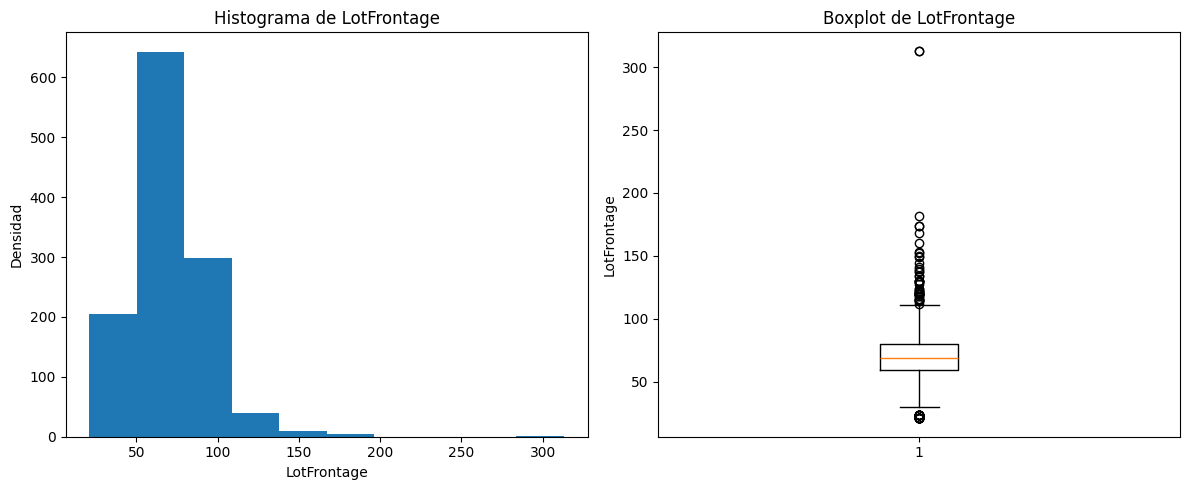



***LotArea***
Estadístico de prueba (ks_statistic) = 0.25146904348964016496
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'LotArea' NO provienen de una distribución normal.



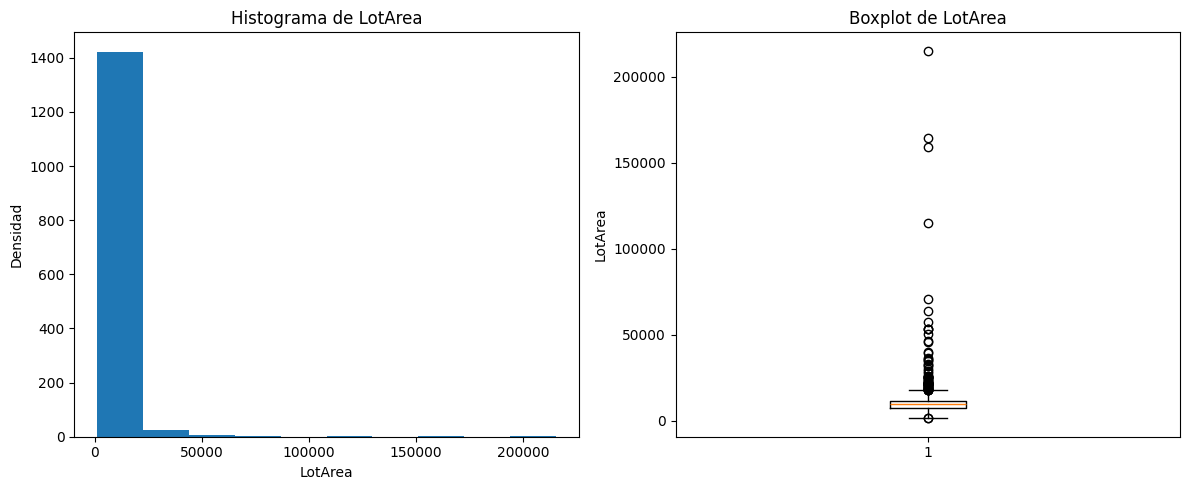



***OverallQual***
Estadístico de prueba (ks_statistic) = 0.15523045240535604528
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'OverallQual' NO provienen de una distribución normal.



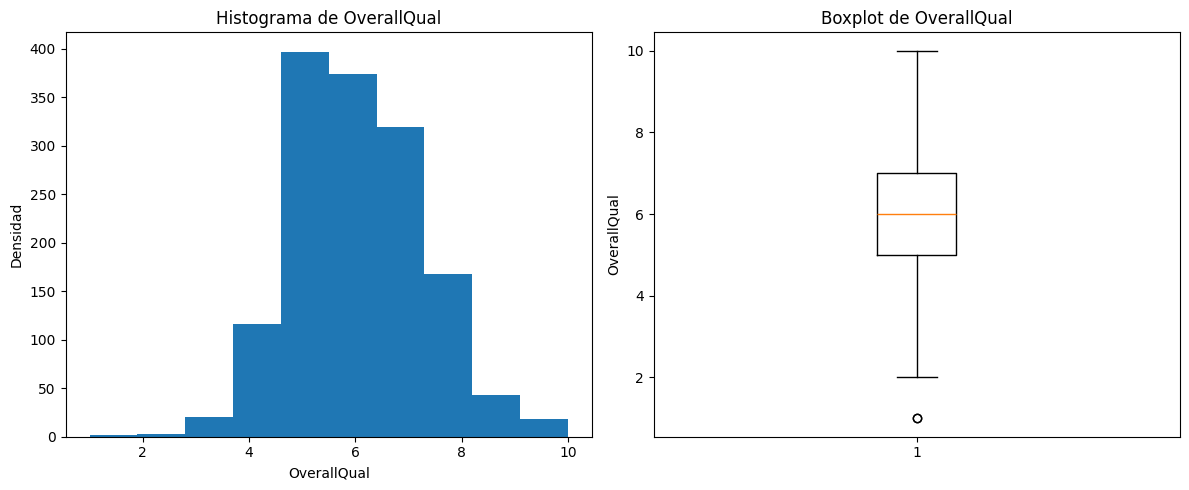



***OverallCond***
Estadístico de prueba (ks_statistic) = 0.32009439633252723123
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'OverallCond' NO provienen de una distribución normal.



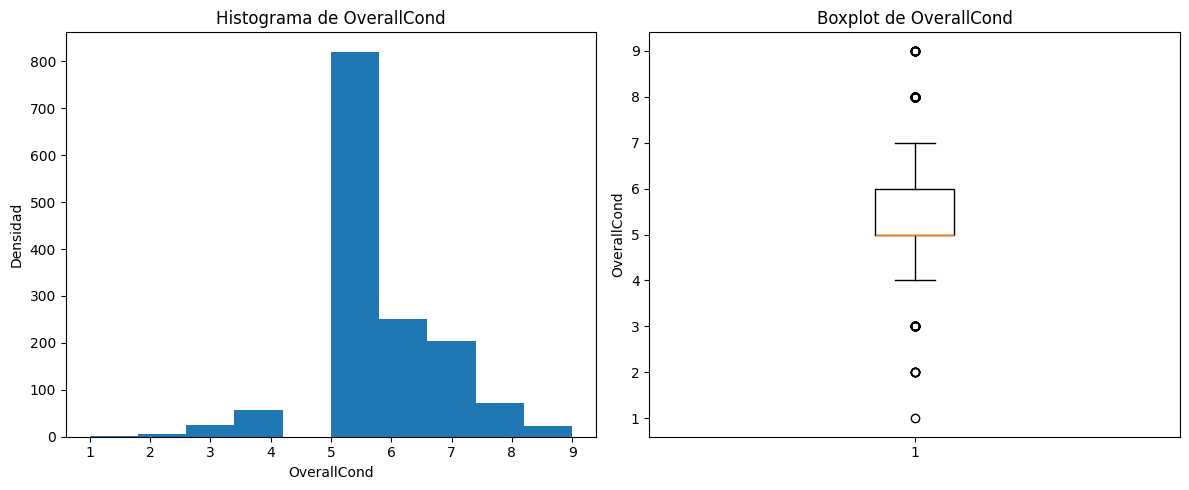



***YearBuilt***
Estadístico de prueba (ks_statistic) = 0.12102104059878149300
p-value = 0.00000000000000000043
Se rechaza la hipótesis nula: los datos de 'YearBuilt' NO provienen de una distribución normal.



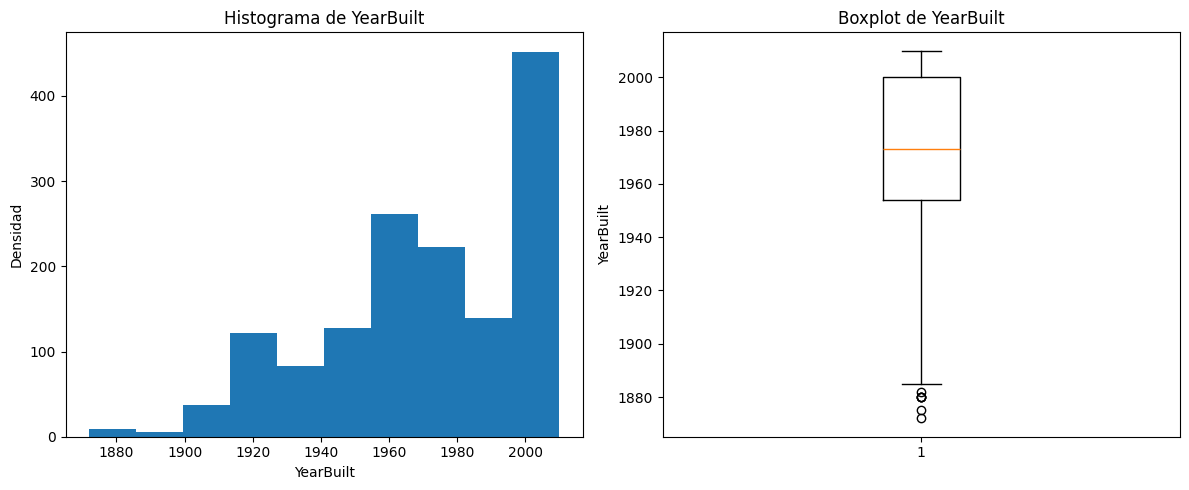



***YearRemodAdd***
Estadístico de prueba (ks_statistic) = 0.17460226465795025685
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'YearRemodAdd' NO provienen de una distribución normal.



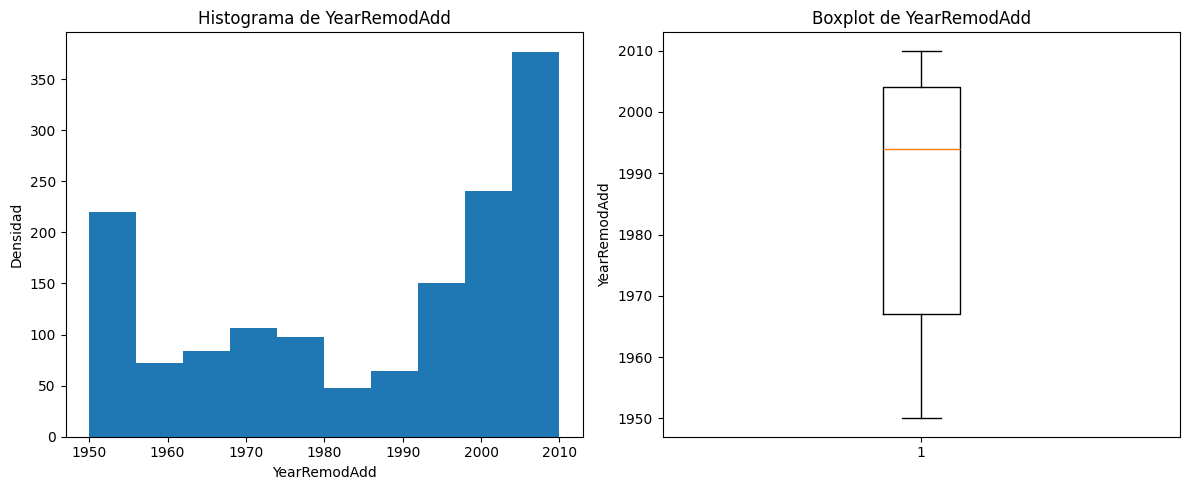



***MasVnrArea***
Estadístico de prueba (ks_statistic) = 0.30959685521481161707
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'MasVnrArea' NO provienen de una distribución normal.



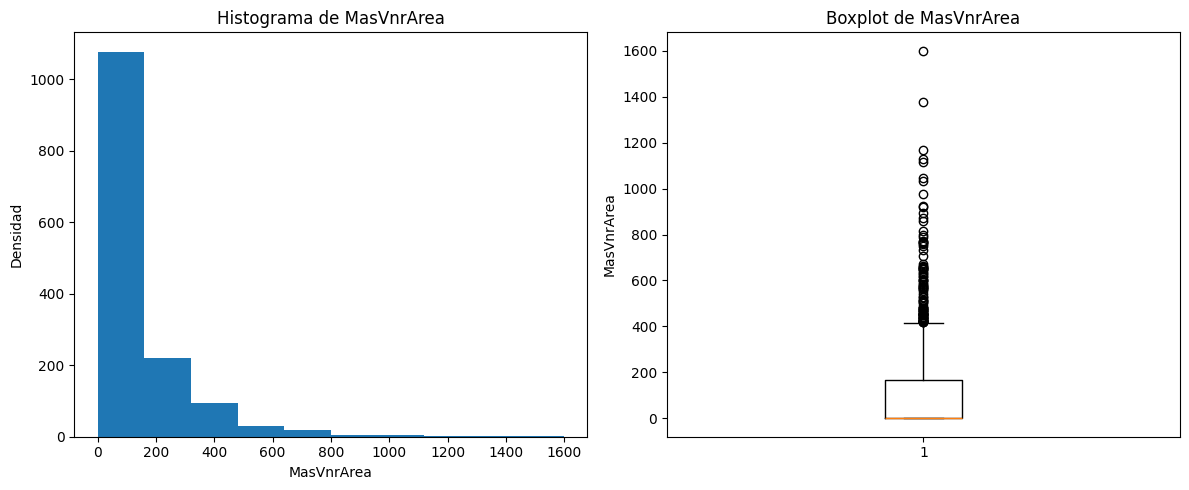



***BsmtFinSF1***
Estadístico de prueba (ks_statistic) = 0.16527213261924900145
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'BsmtFinSF1' NO provienen de una distribución normal.



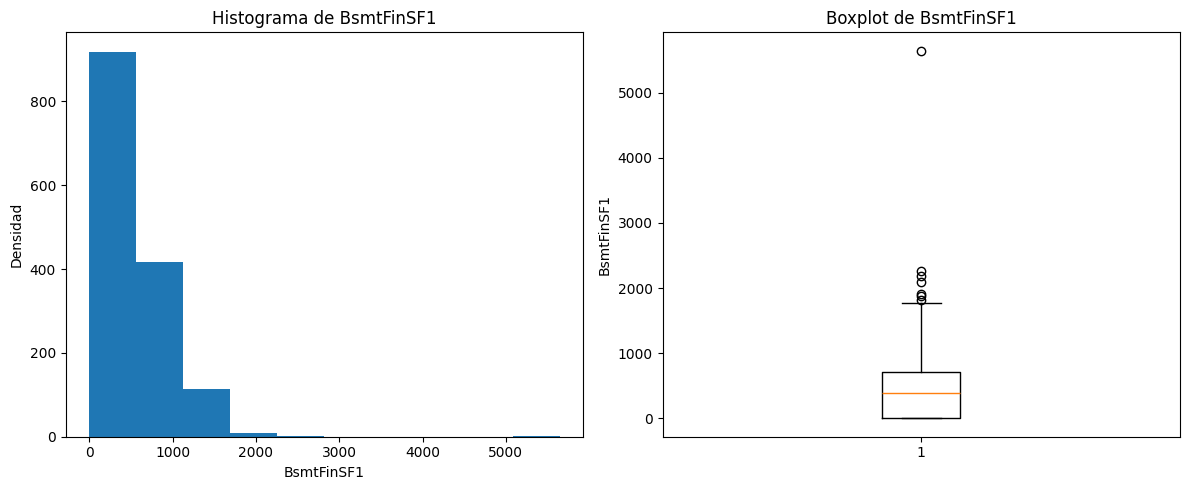



***BsmtFinSF2***
Estadístico de prueba (ks_statistic) = 0.49919290730840804038
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'BsmtFinSF2' NO provienen de una distribución normal.



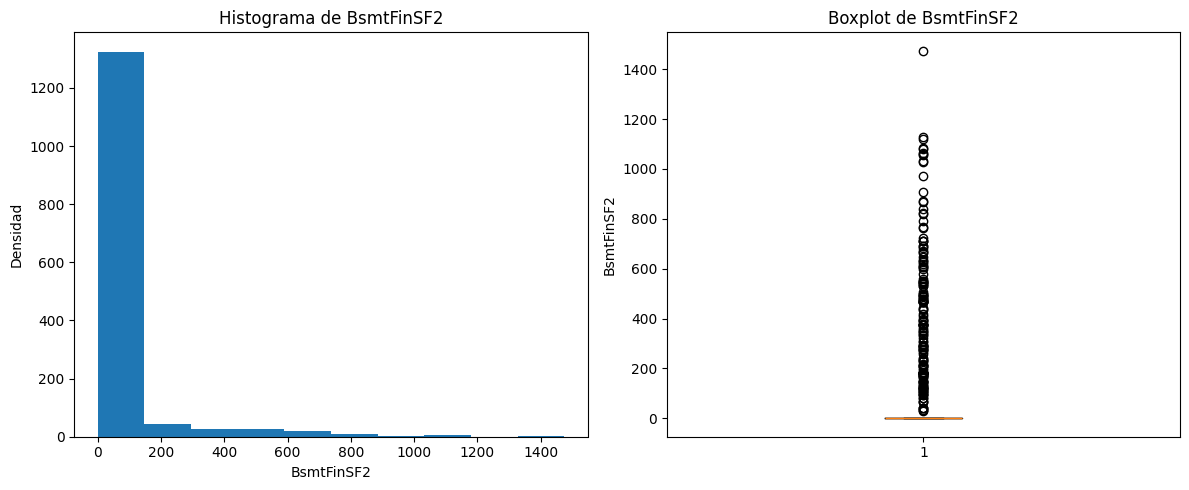



***BsmtUnfSF***
Estadístico de prueba (ks_statistic) = 0.09954025682683936838
p-value = 0.00000000000047991940
Se rechaza la hipótesis nula: los datos de 'BsmtUnfSF' NO provienen de una distribución normal.



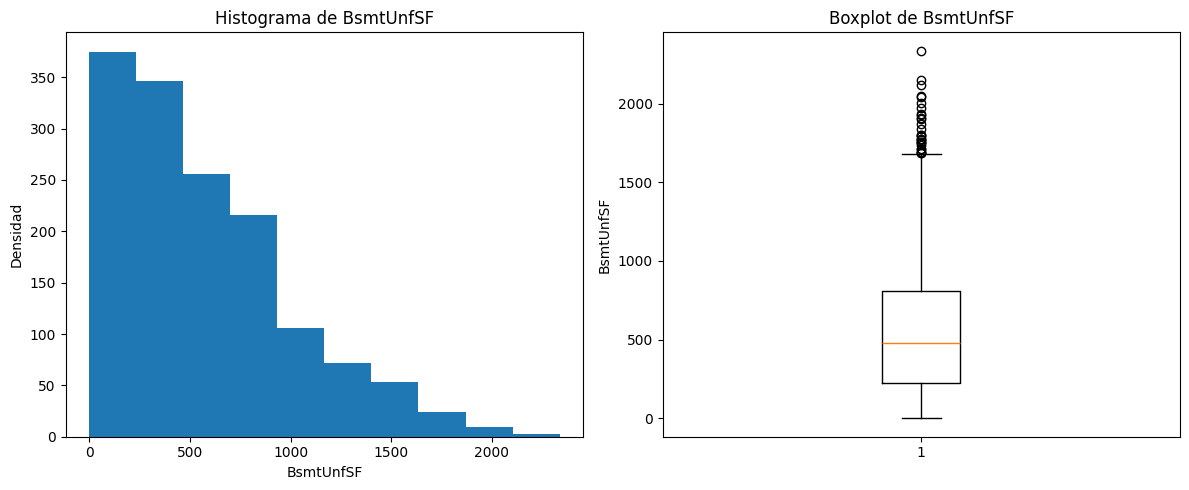



***TotalBsmtSF***
Estadístico de prueba (ks_statistic) = 0.07593952292488681532
p-value = 0.00000009069791178247
Se rechaza la hipótesis nula: los datos de 'TotalBsmtSF' NO provienen de una distribución normal.



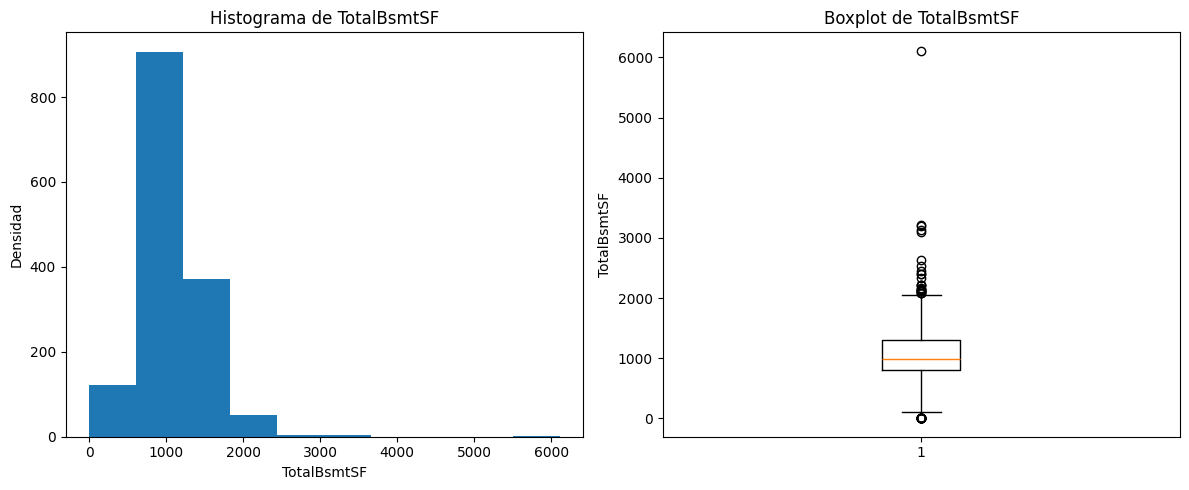



***1stFlrSF***
Estadístico de prueba (ks_statistic) = 0.08691902539030016417
p-value = 0.00000000047910297651
Se rechaza la hipótesis nula: los datos de '1stFlrSF' NO provienen de una distribución normal.



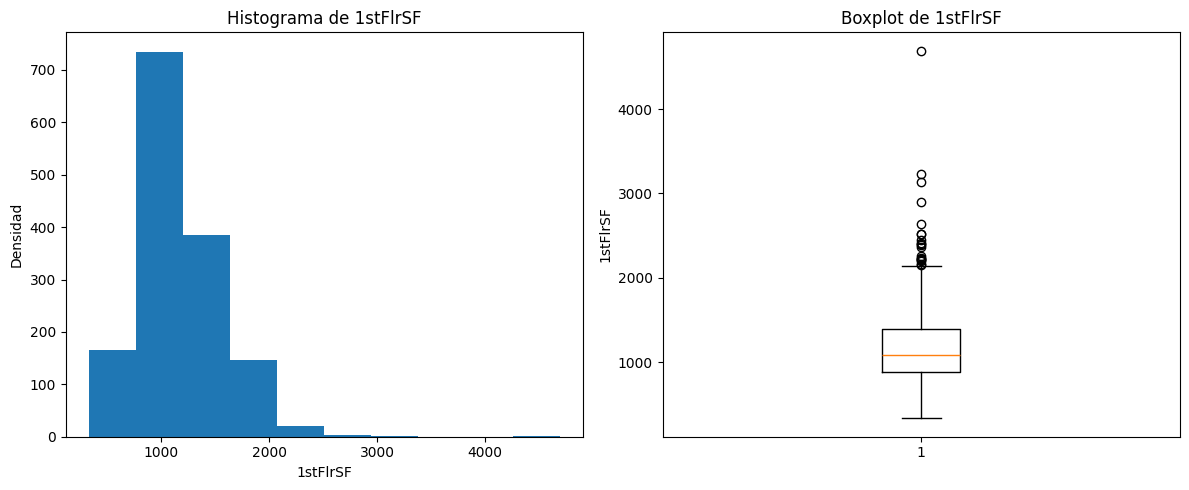



***2ndFlrSF***
Estadístico de prueba (ks_statistic) = 0.35454893950711596773
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de '2ndFlrSF' NO provienen de una distribución normal.



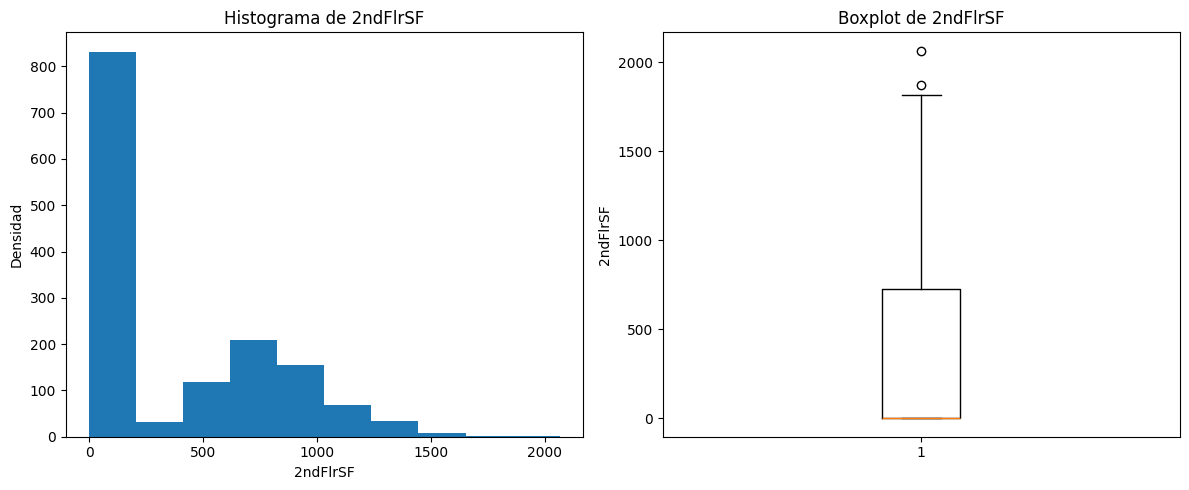



***LowQualFinSF***
Estadístico de prueba (ks_statistic) = 0.53004594744102073722
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'LowQualFinSF' NO provienen de una distribución normal.



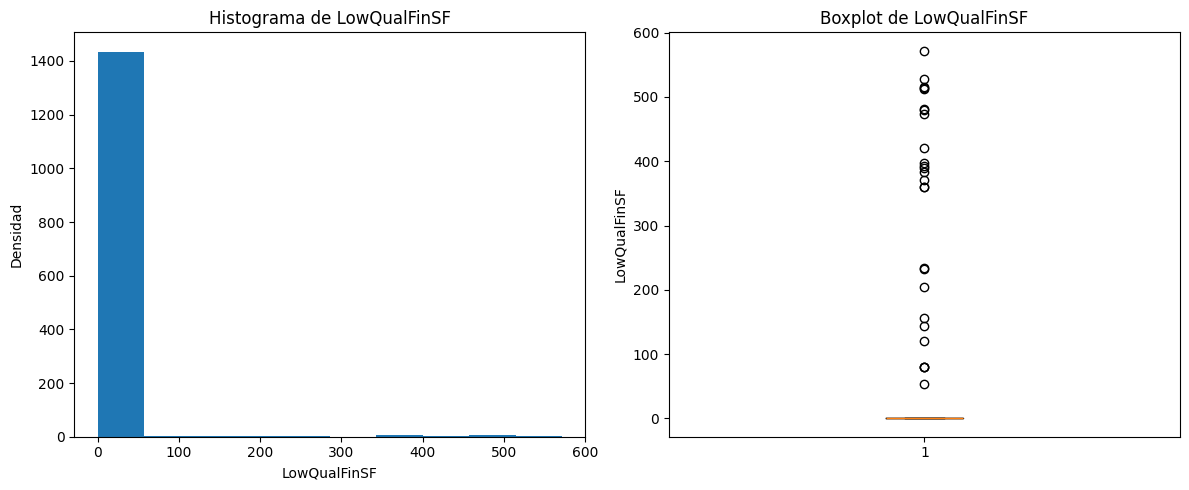



***GrLivArea***
Estadístico de prueba (ks_statistic) = 0.06746422821216169208
p-value = 0.00000319638564181046
Se rechaza la hipótesis nula: los datos de 'GrLivArea' NO provienen de una distribución normal.



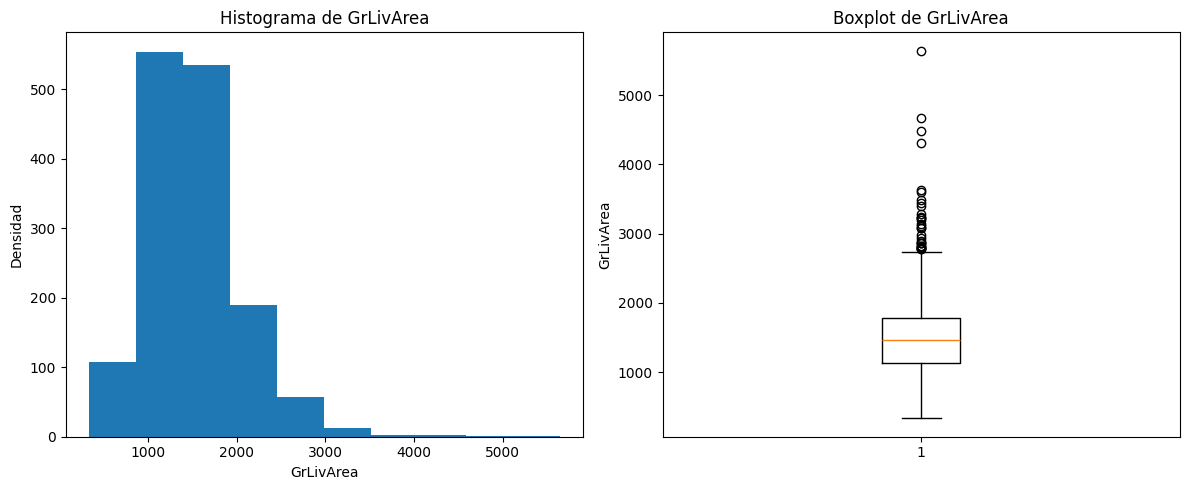



***BsmtFullBath***
Estadístico de prueba (ks_statistic) = 0.38018315898889798454
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'BsmtFullBath' NO provienen de una distribución normal.



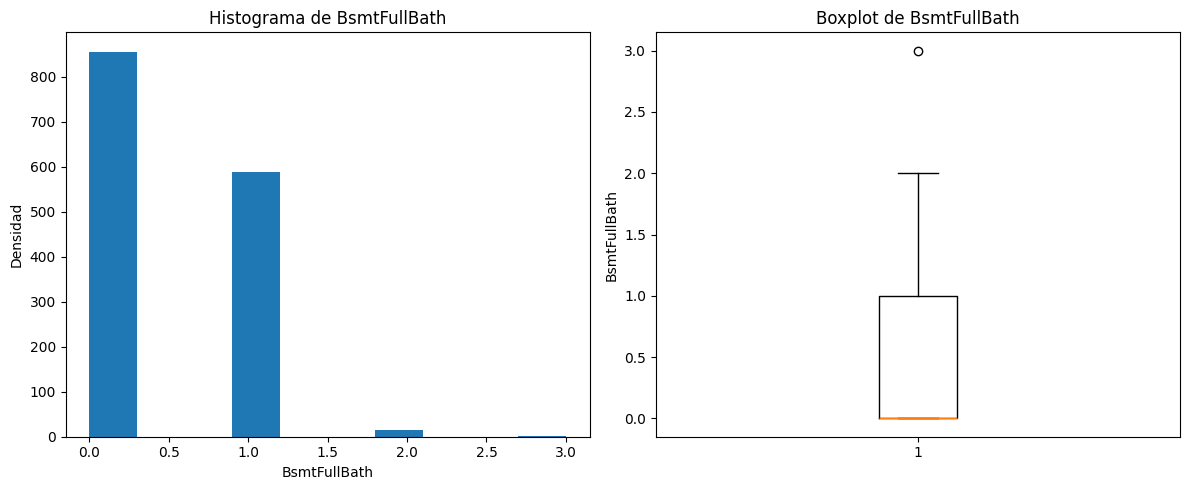



***BsmtHalfBath***
Estadístico de prueba (ks_statistic) = 0.53908171080317934809
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'BsmtHalfBath' NO provienen de una distribución normal.



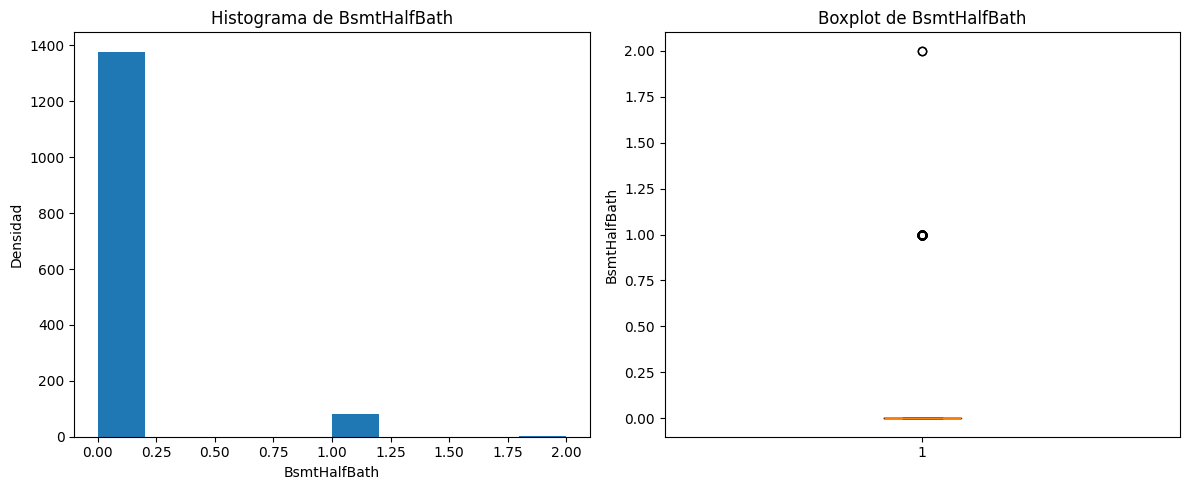



***FullBath***
Estadístico de prueba (ks_statistic) = 0.33379047653284454888
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'FullBath' NO provienen de una distribución normal.



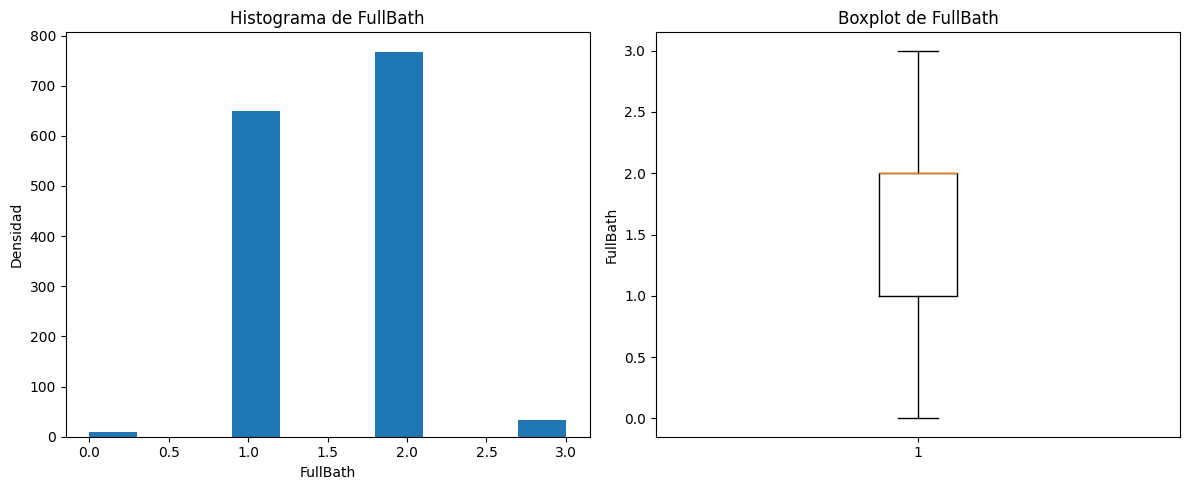



***HalfBath***
Estadístico de prueba (ks_statistic) = 0.40219924906121917729
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'HalfBath' NO provienen de una distribución normal.



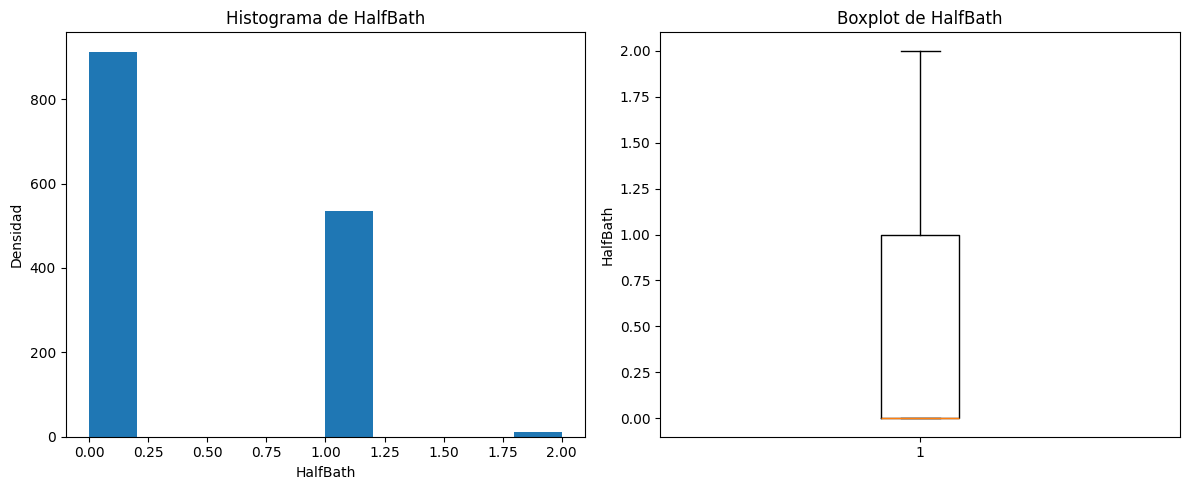



***BedroomAbvGr***
Estadístico de prueba (ks_statistic) = 0.28148584016671784891
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'BedroomAbvGr' NO provienen de una distribución normal.



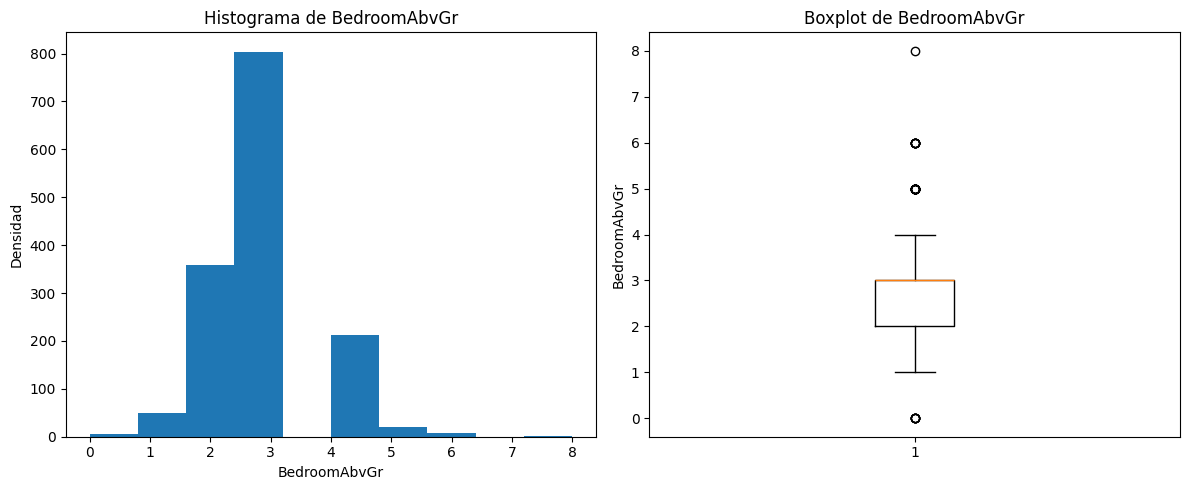



***KitchenAbvGr***
Estadístico de prueba (ks_statistic) = 0.53784291401327699589
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'KitchenAbvGr' NO provienen de una distribución normal.



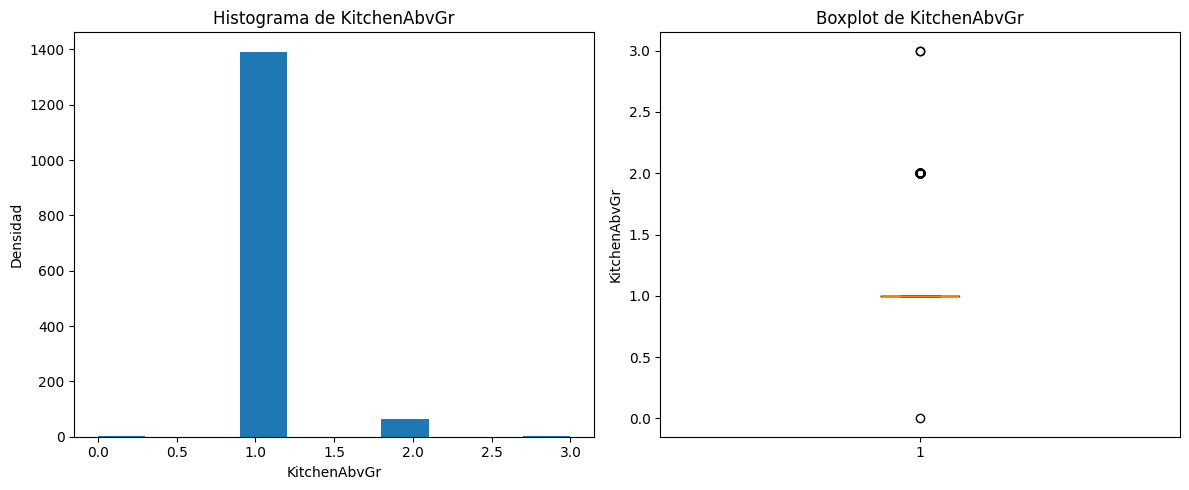



***TotRmsAbvGrd***
Estadístico de prueba (ks_statistic) = 0.16748240064141528549
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'TotRmsAbvGrd' NO provienen de una distribución normal.



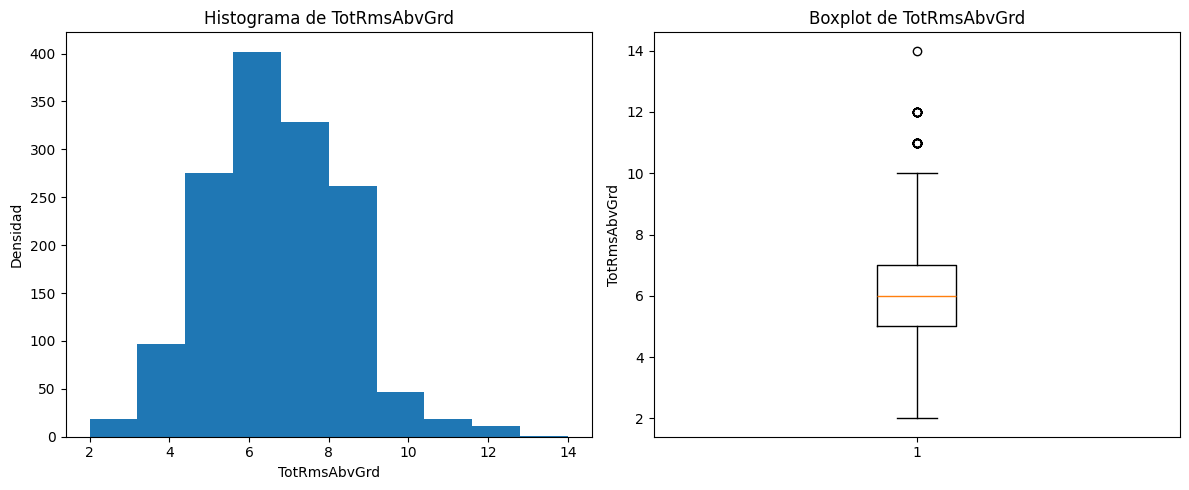



***Fireplaces***
Estadístico de prueba (ks_statistic) = 0.30185803232051472422
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'Fireplaces' NO provienen de una distribución normal.



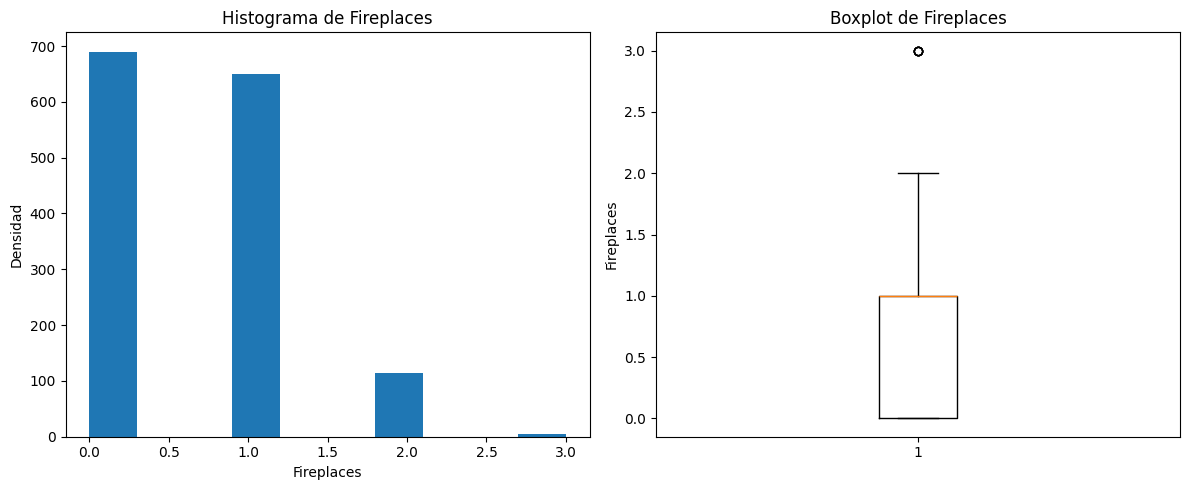



***GarageYrBlt***
Estadístico de prueba (ks_statistic) = 0.12757418726210723037
p-value = 0.00000000000000000005
Se rechaza la hipótesis nula: los datos de 'GarageYrBlt' NO provienen de una distribución normal.



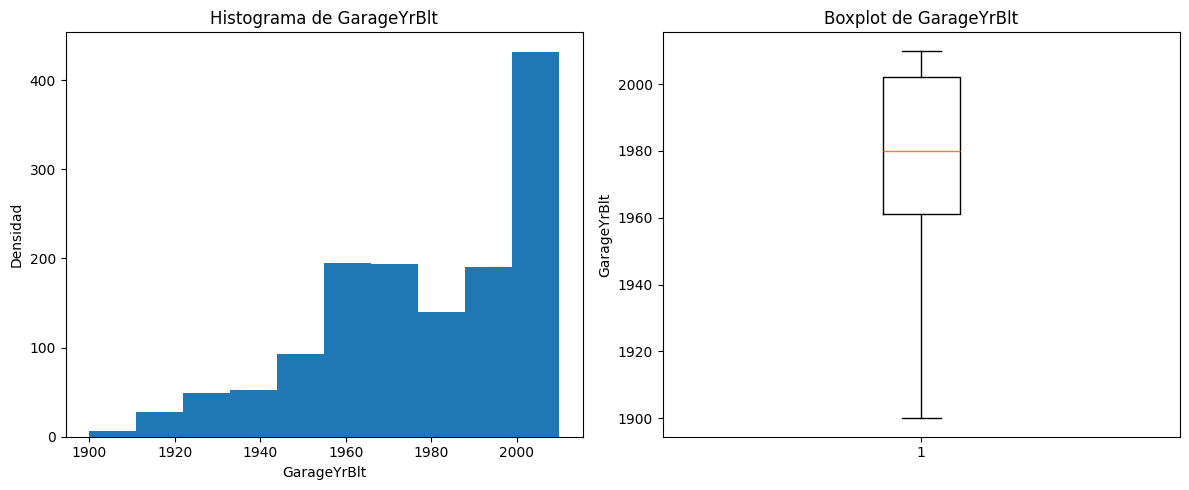



***GarageCars***
Estadístico de prueba (ks_statistic) = 0.31415592332071418102
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'GarageCars' NO provienen de una distribución normal.



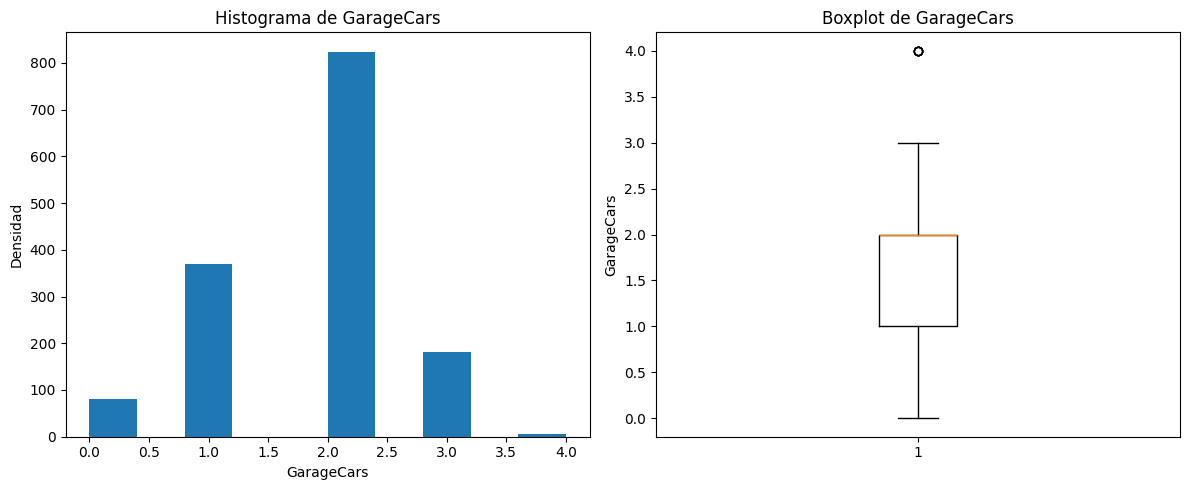



***GarageArea***
Estadístico de prueba (ks_statistic) = 0.07528339704878073135
p-value = 0.00000012131559844146
Se rechaza la hipótesis nula: los datos de 'GarageArea' NO provienen de una distribución normal.



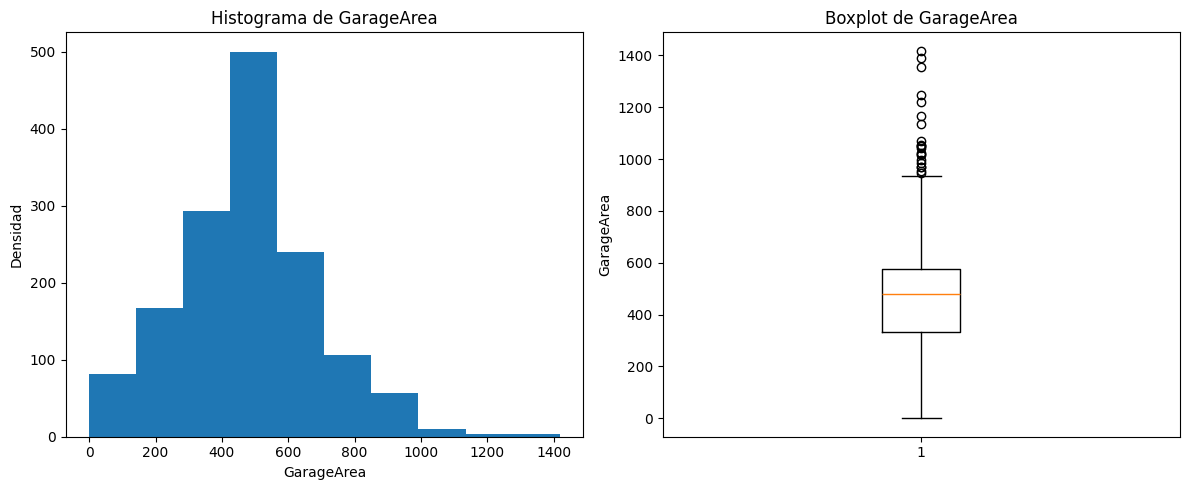



***WoodDeckSF***
Estadístico de prueba (ks_statistic) = 0.29526021571137917032
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'WoodDeckSF' NO provienen de una distribución normal.



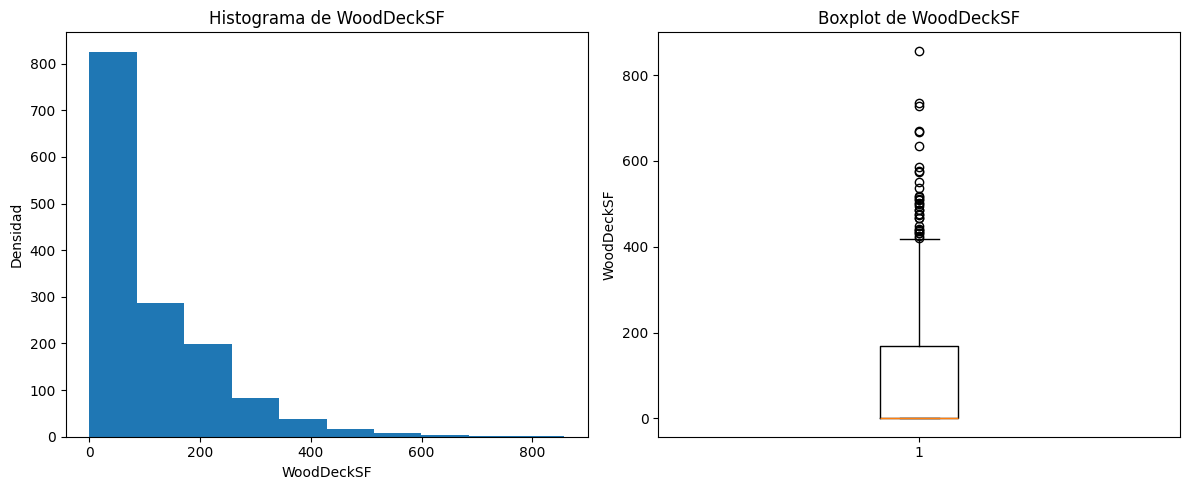



***OpenPorchSF***
Estadístico de prueba (ks_statistic) = 0.24056593871002424079
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'OpenPorchSF' NO provienen de una distribución normal.



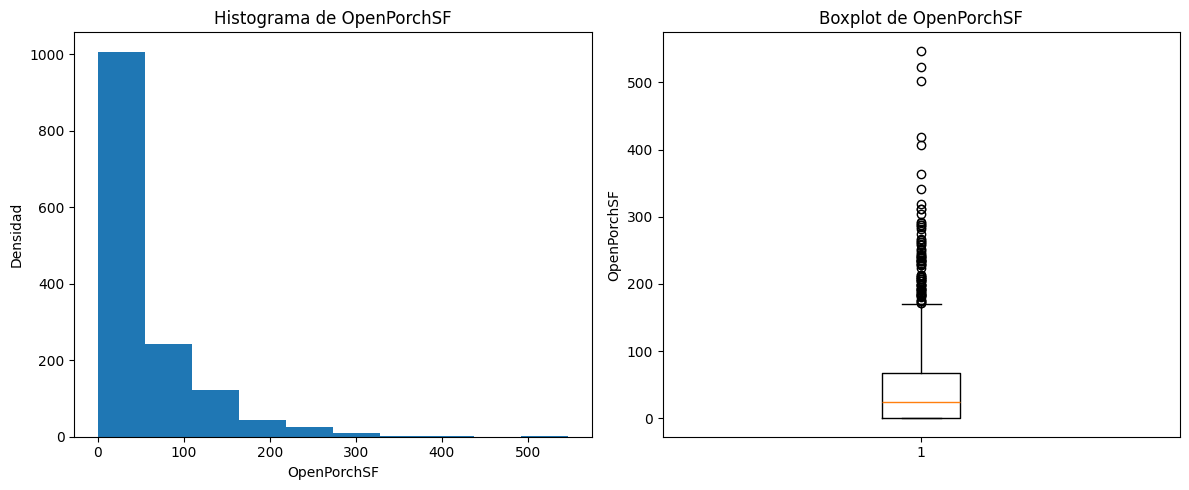



***EnclosedPorch***
Estadístico de prueba (ks_statistic) = 0.49785822223757814076
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'EnclosedPorch' NO provienen de una distribución normal.



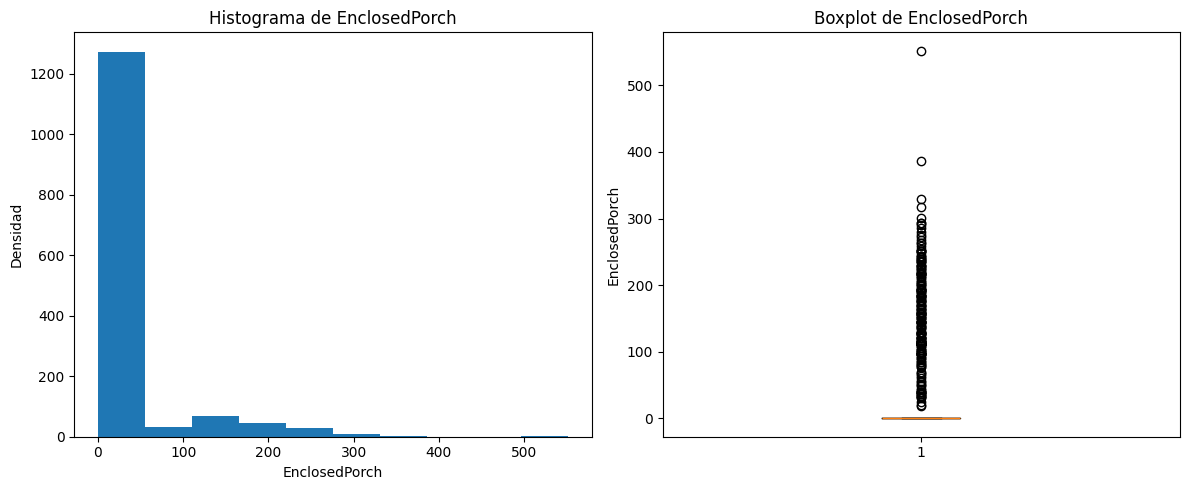



***3SsnPorch***
Estadístico de prueba (ks_statistic) = 0.52986981826316781330
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de '3SsnPorch' NO provienen de una distribución normal.



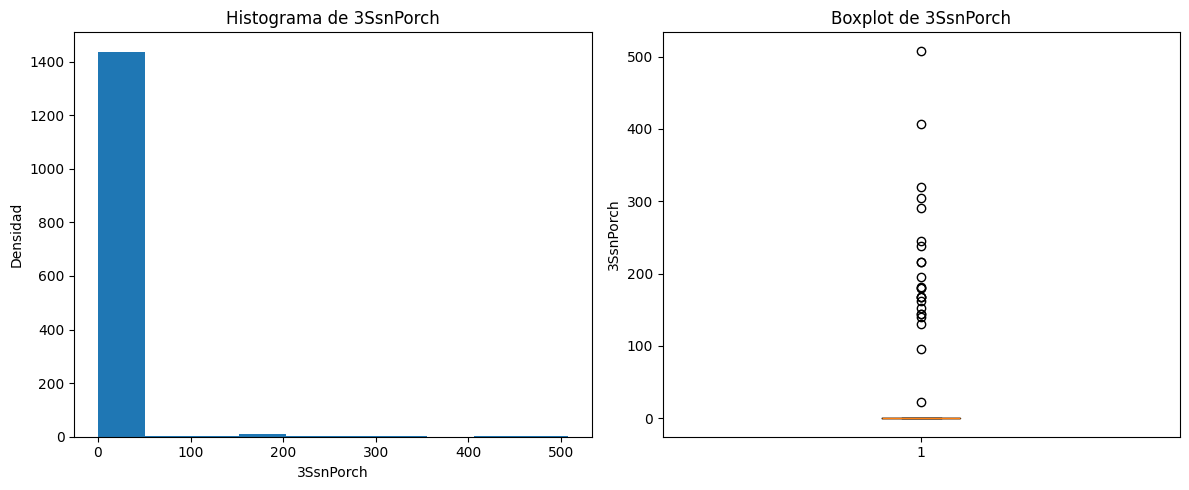



***ScreenPorch***
Estadístico de prueba (ks_statistic) = 0.52704796223031225022
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'ScreenPorch' NO provienen de una distribución normal.



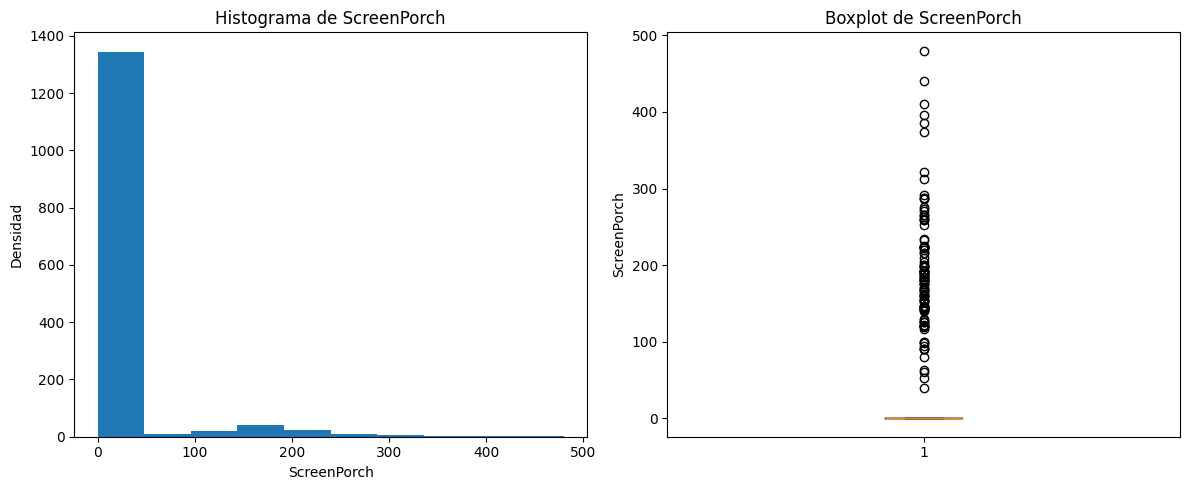



***PoolArea***
Estadístico de prueba (ks_statistic) = 0.52258798585248533719
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'PoolArea' NO provienen de una distribución normal.



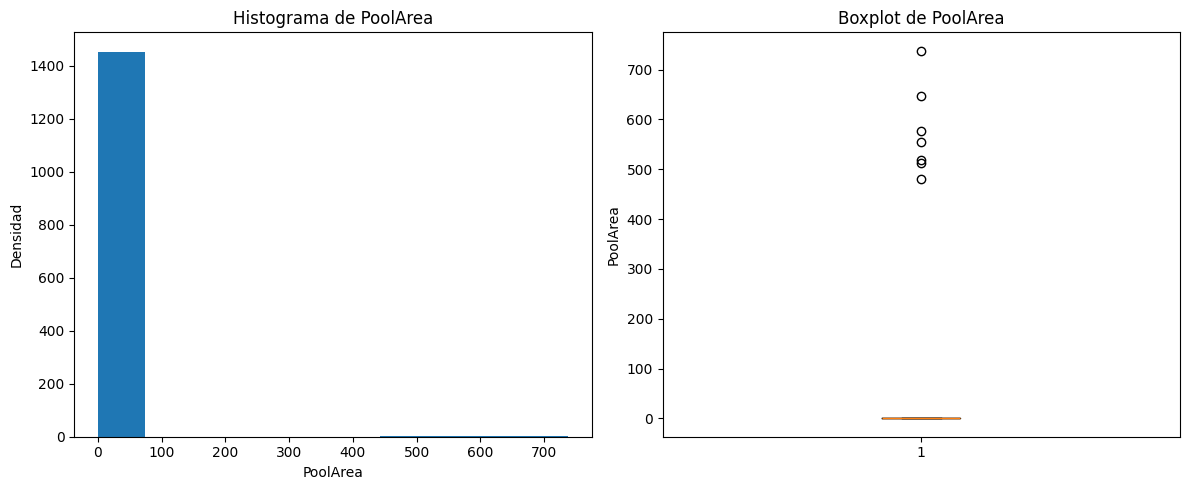



***MiscVal***
Estadístico de prueba (ks_statistic) = 0.49932115799135684542
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'MiscVal' NO provienen de una distribución normal.



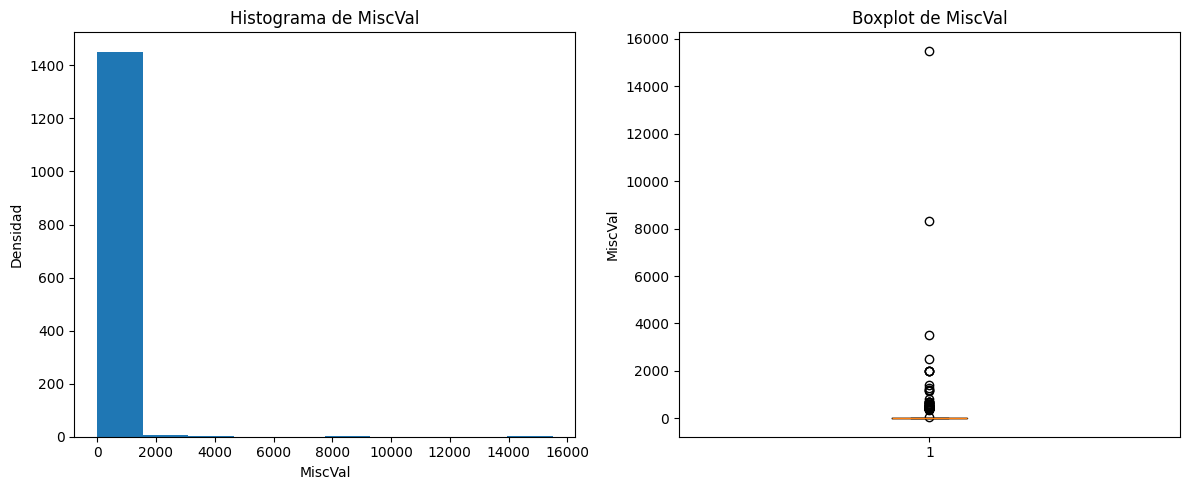



***YrSold***
Estadístico de prueba (ks_statistic) = 0.17094819864951110722
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'YrSold' NO provienen de una distribución normal.



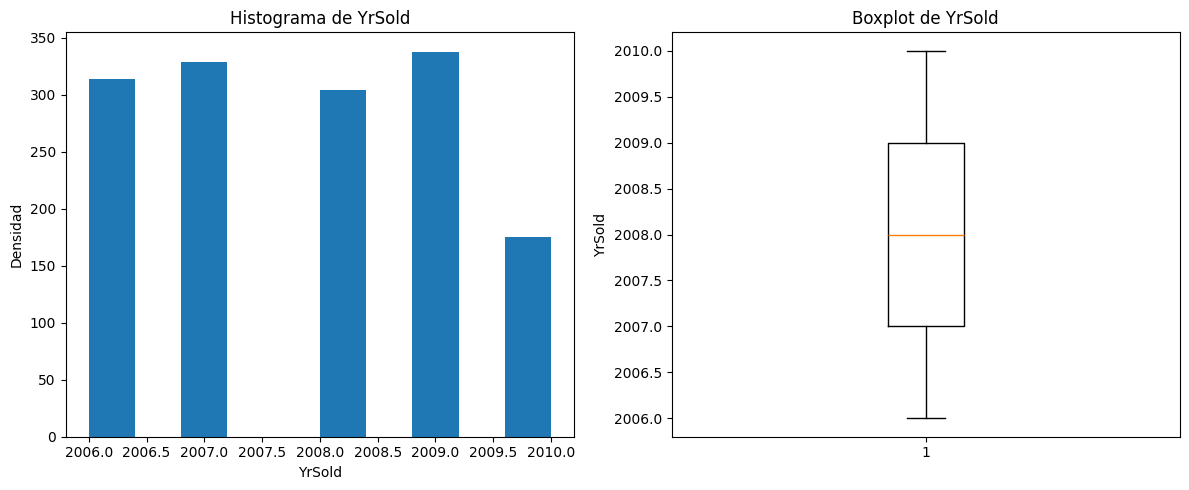



***SalePrice***
Estadístico de prueba (ks_statistic) = 0.12366990729158056084
p-value = 0.00000000000000000006
Se rechaza la hipótesis nula: los datos de 'SalePrice' NO provienen de una distribución normal.



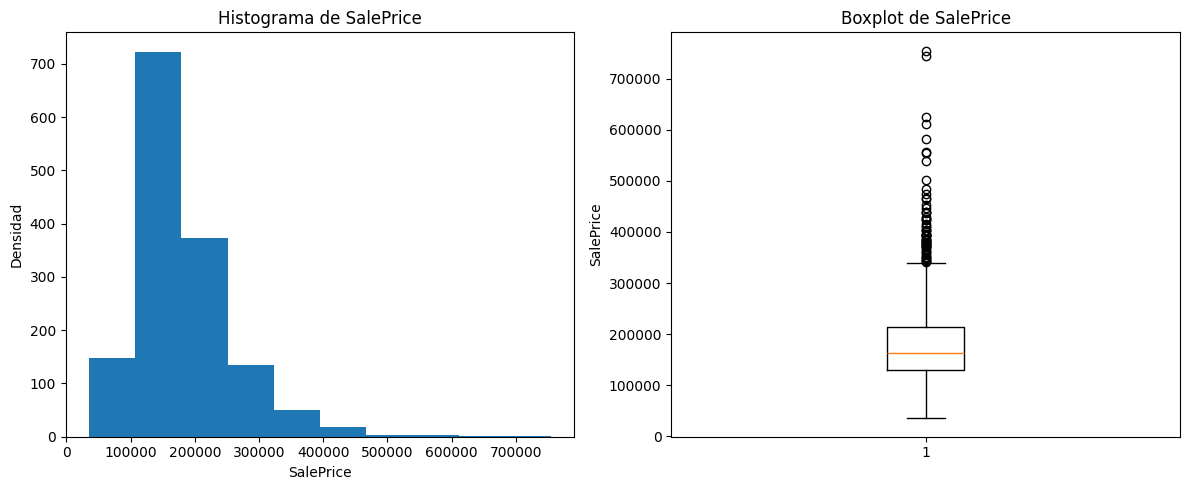

In [7]:
for col in cuantitiativas:
    print("***" + col + "***")
    funciones.prueba_de_normalidad(house_prices[col],col)
    print("\n")

***MSZoning***


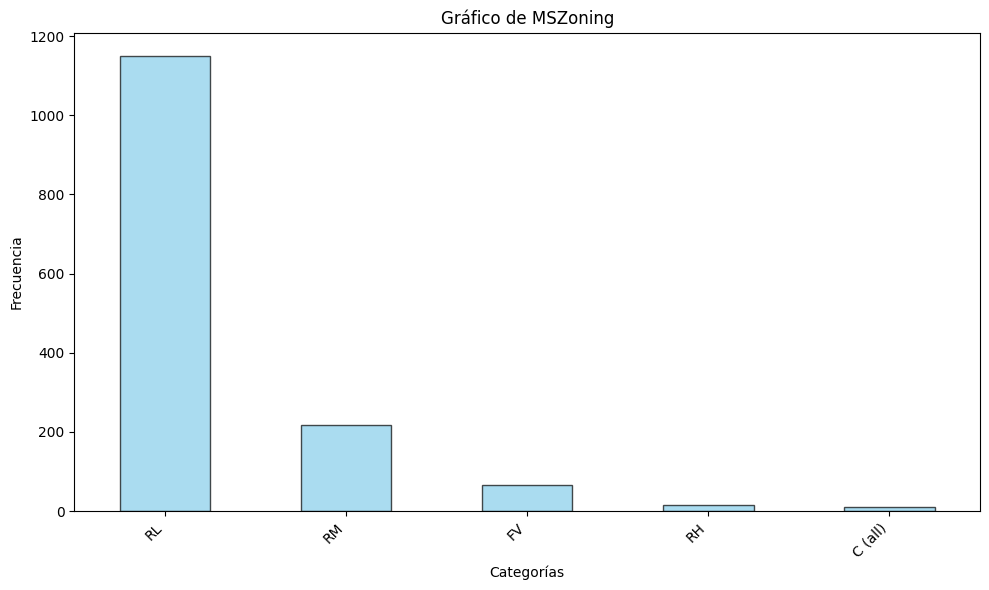



***Street***


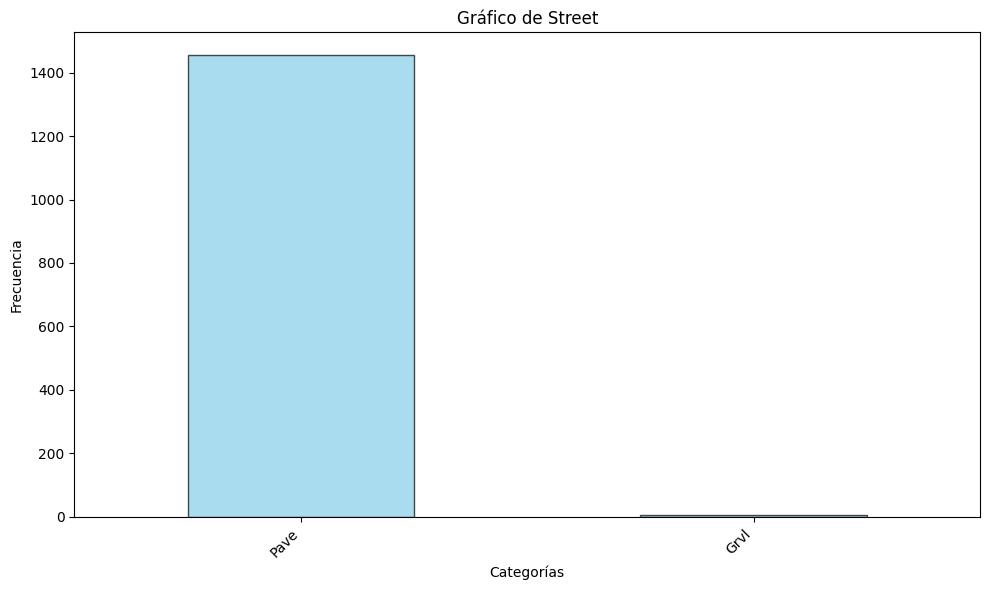



***Alley***


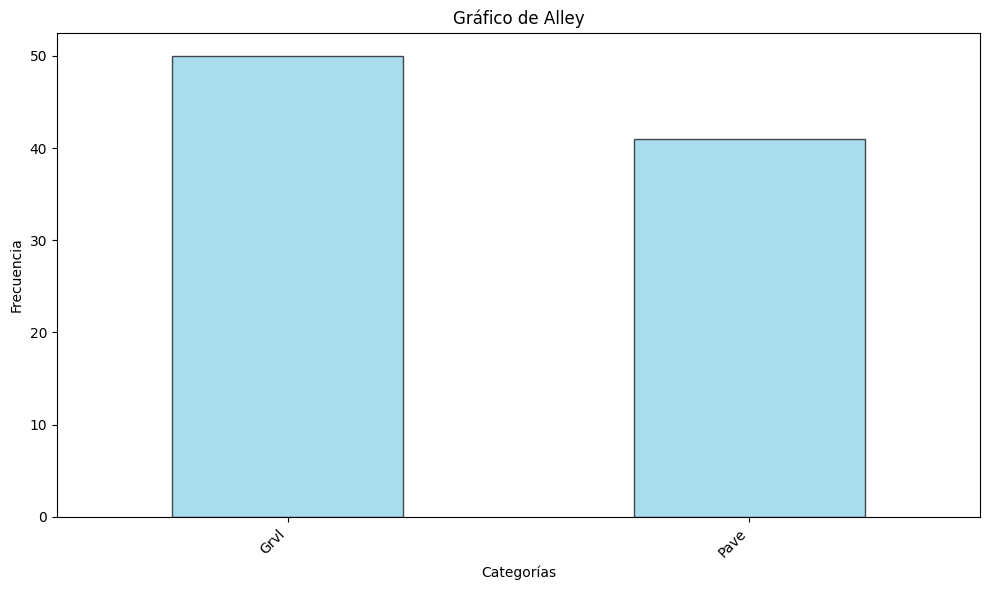



***LotShape***


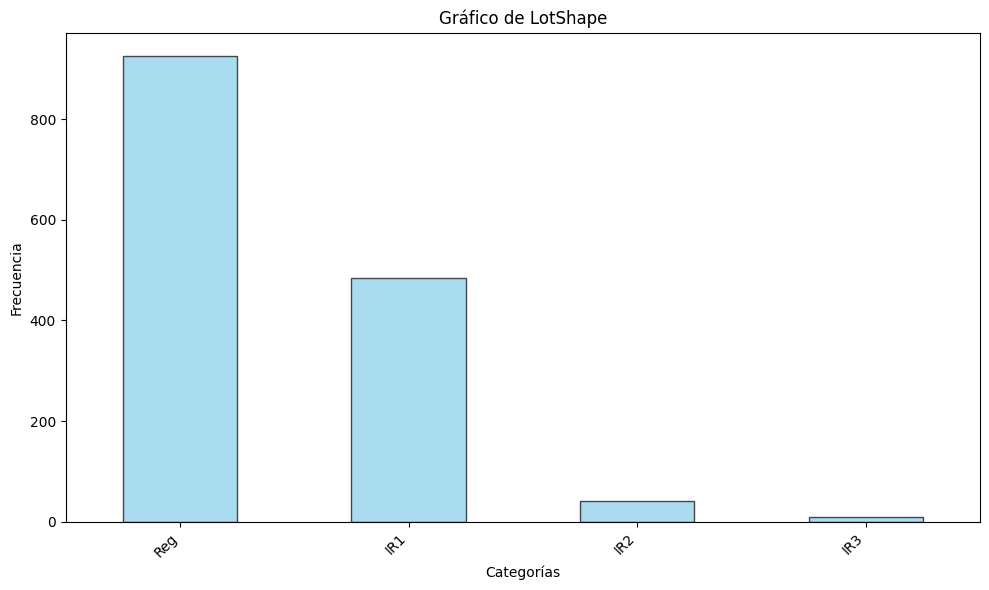



***LandContour***


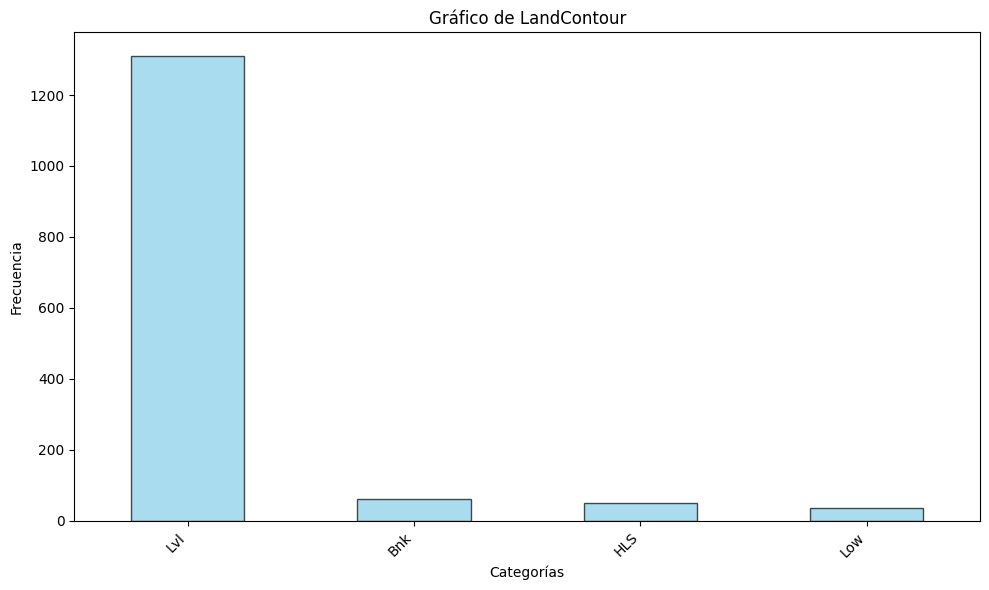



***Utilities***


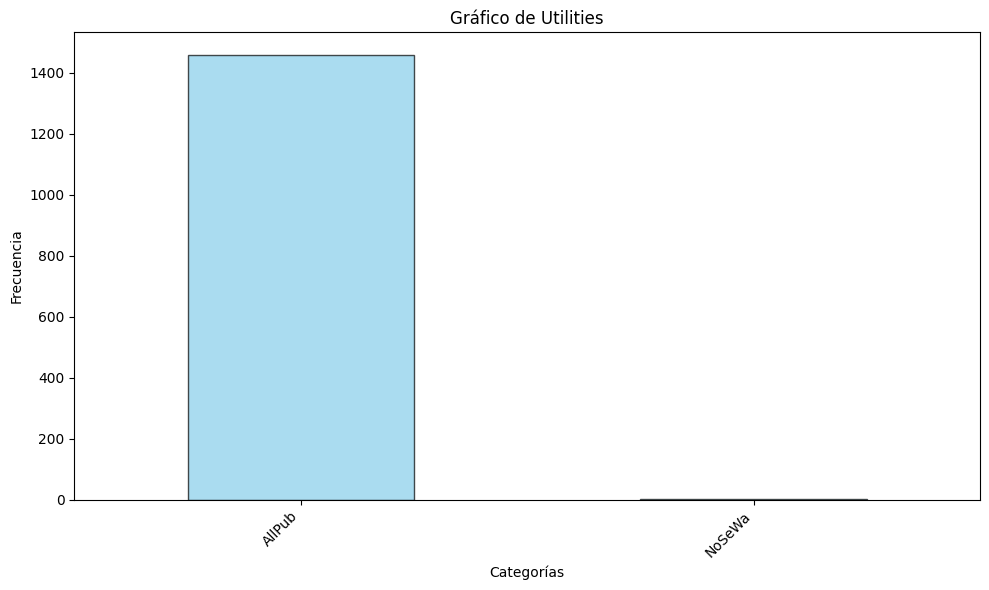



***LotConfig***


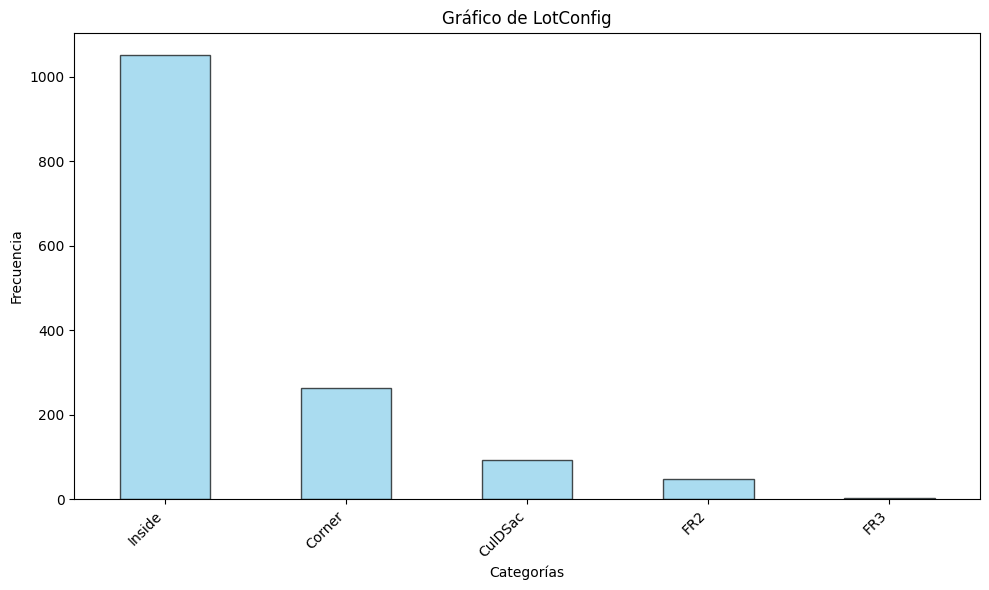



***LandSlope***


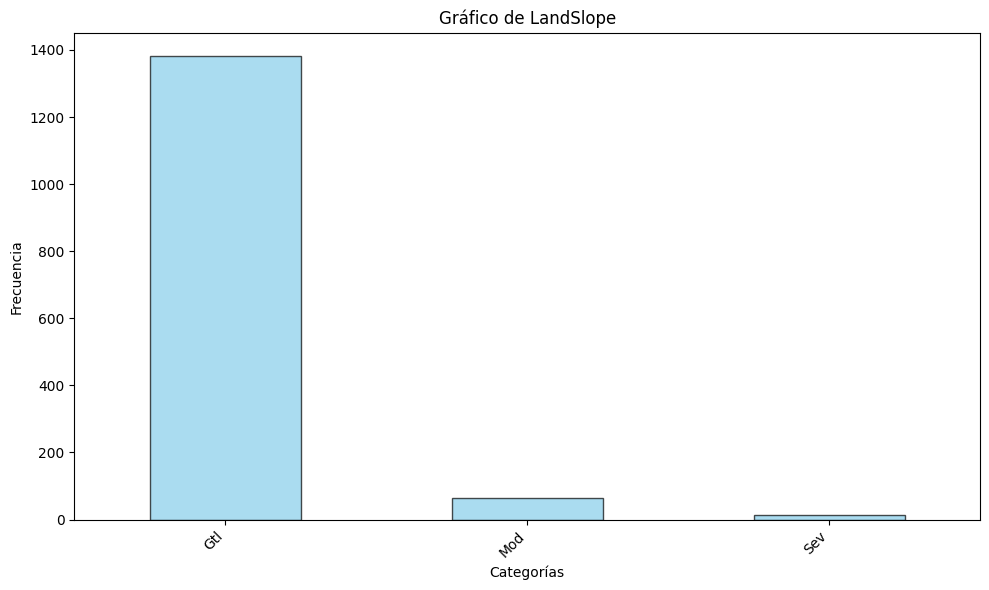



***Neighborhood***


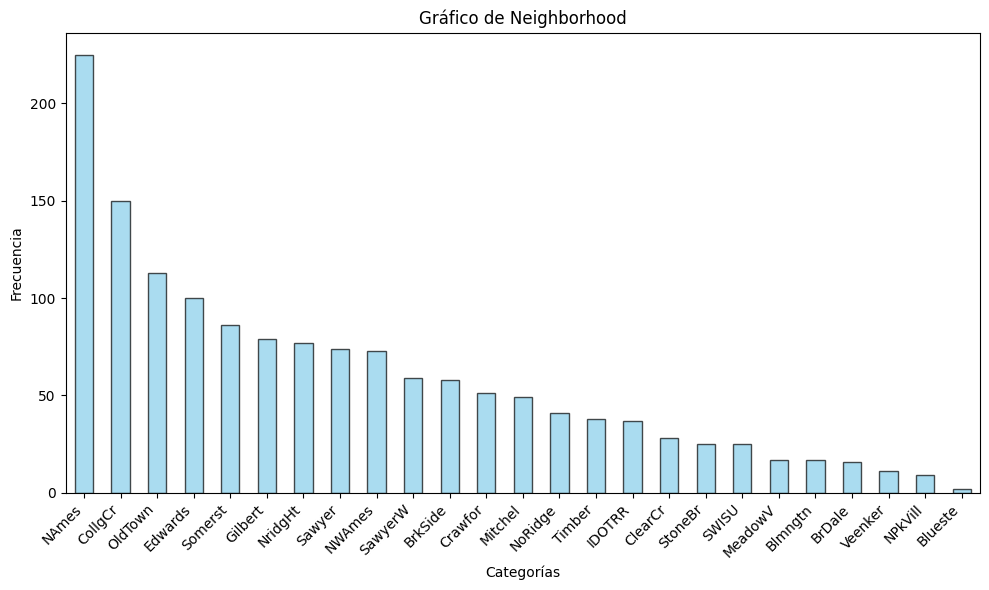



***Condition1***


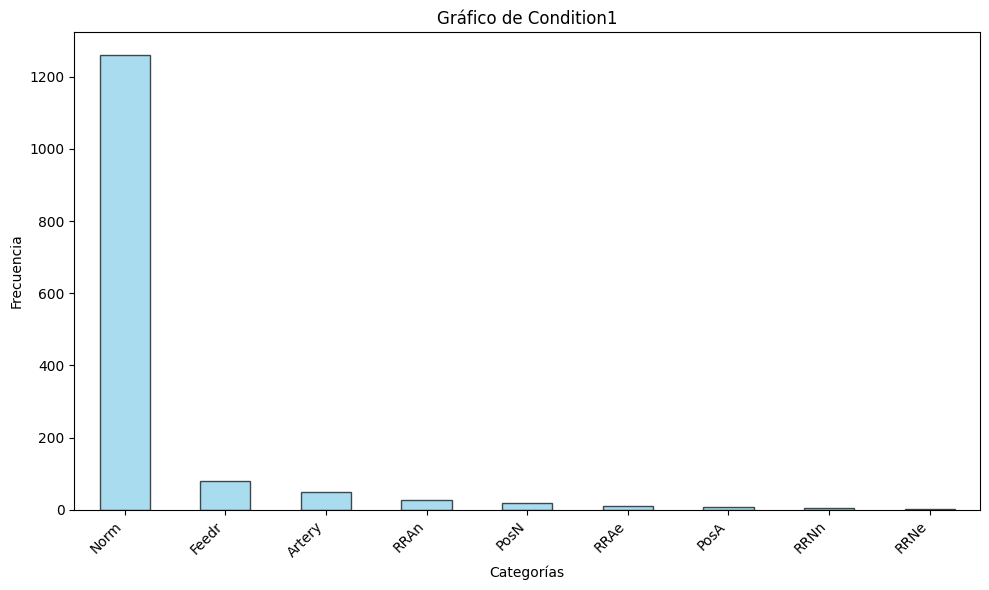



***Condition2***


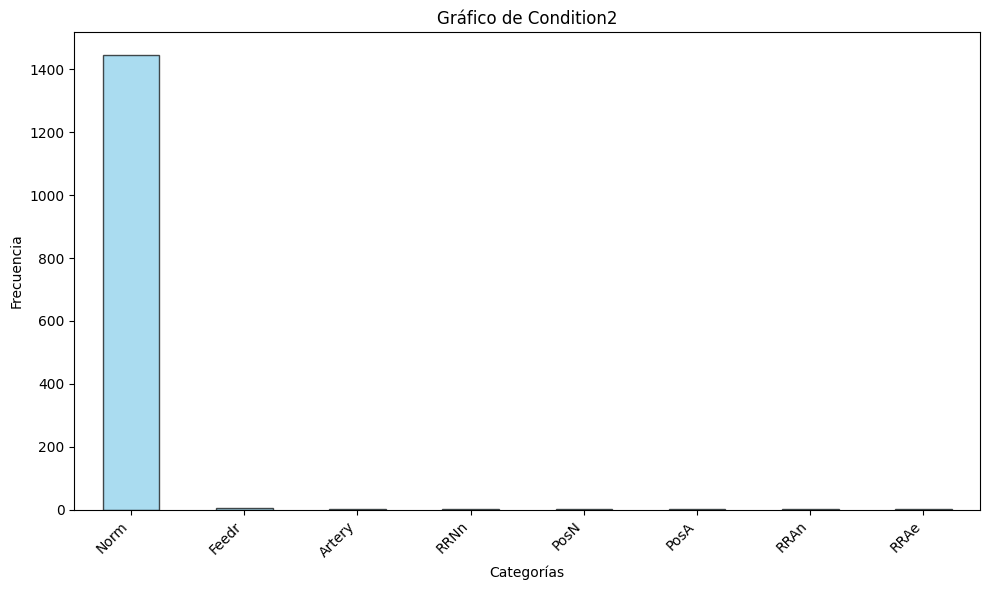



***BldgType***


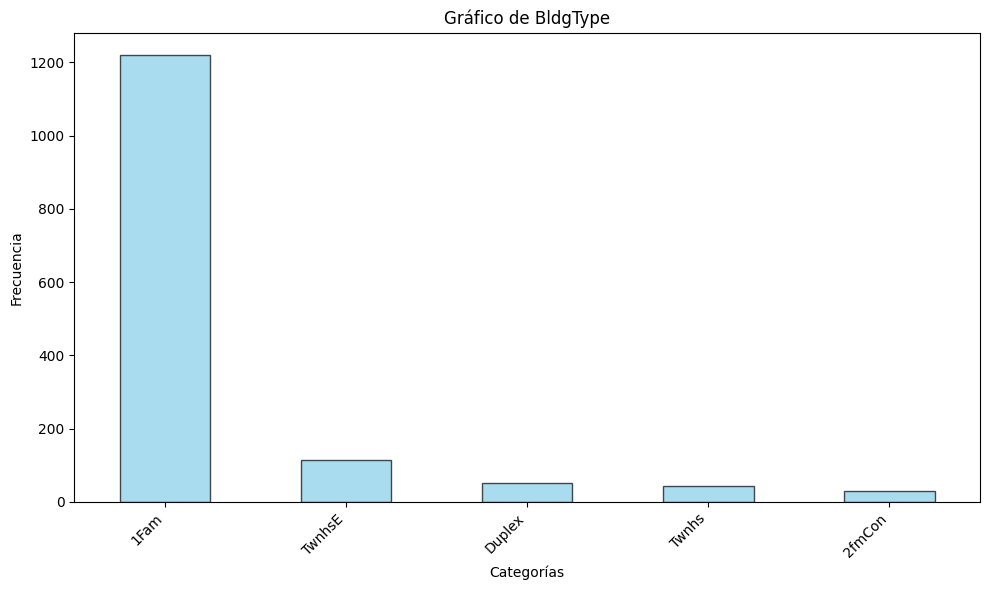



***HouseStyle***


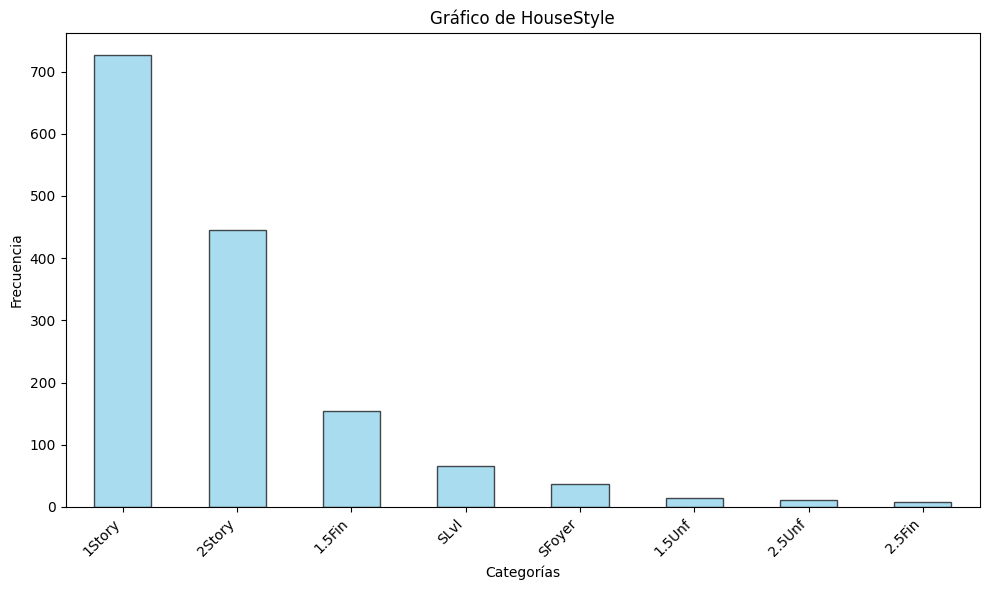



***RoofStyle***


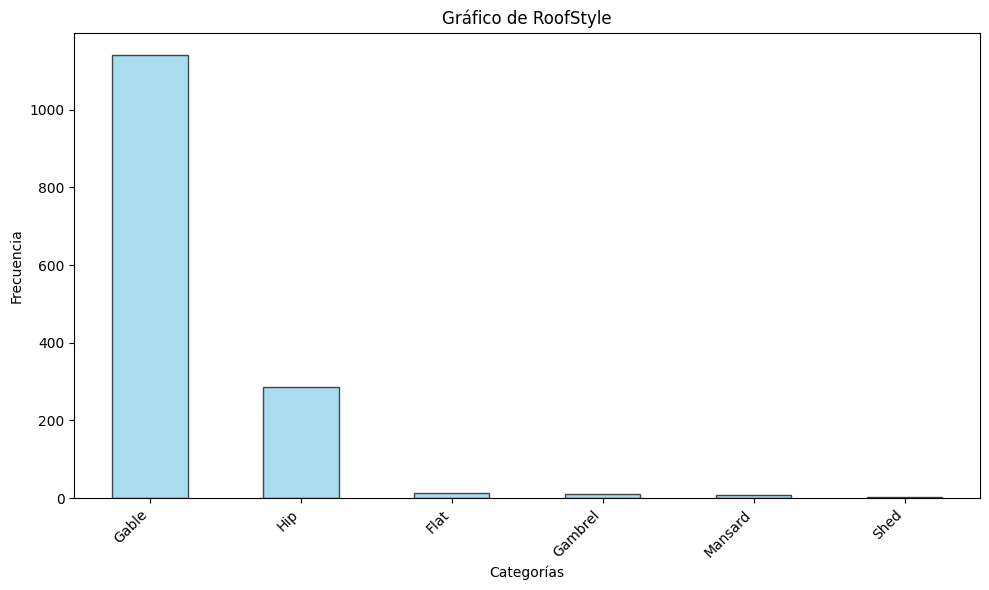



***RoofMatl***


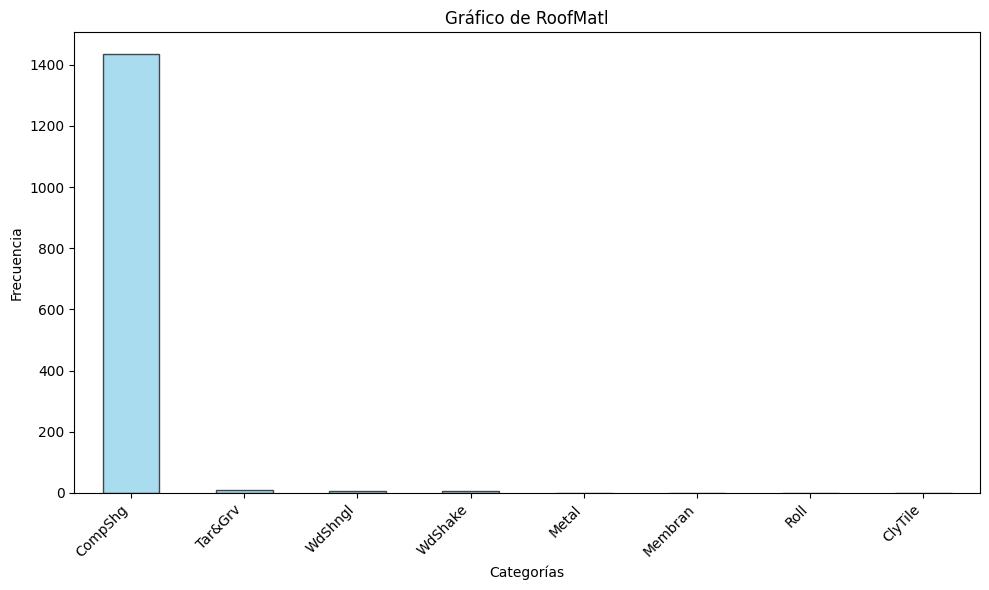



***Exterior1st***


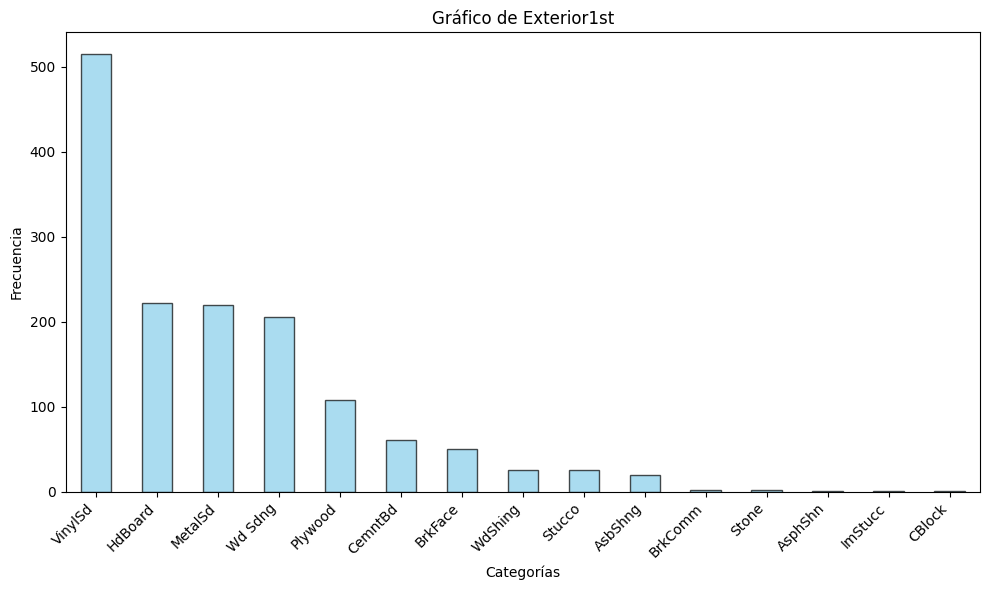



***Exterior2nd***


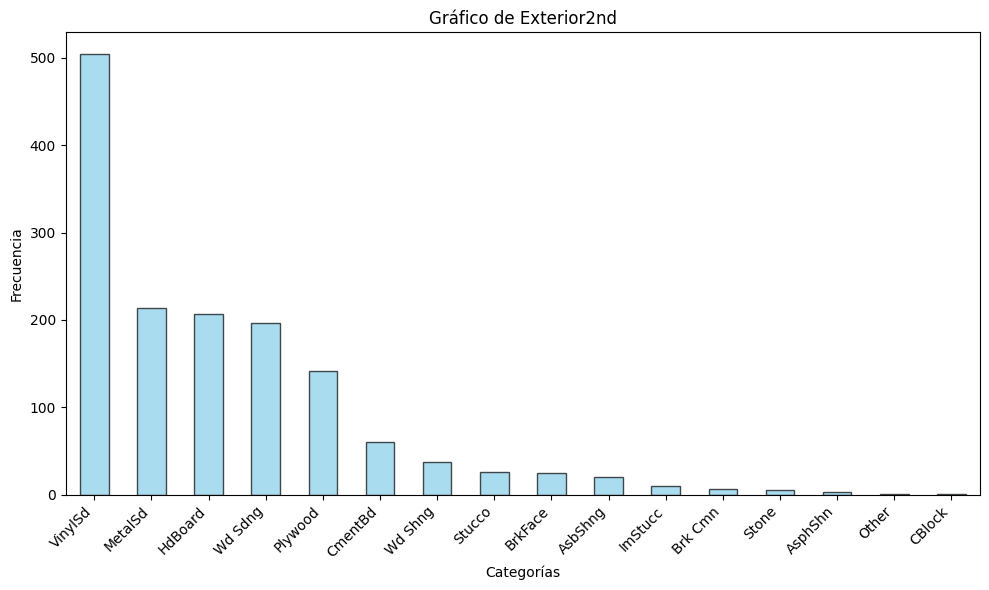



***MasVnrType***


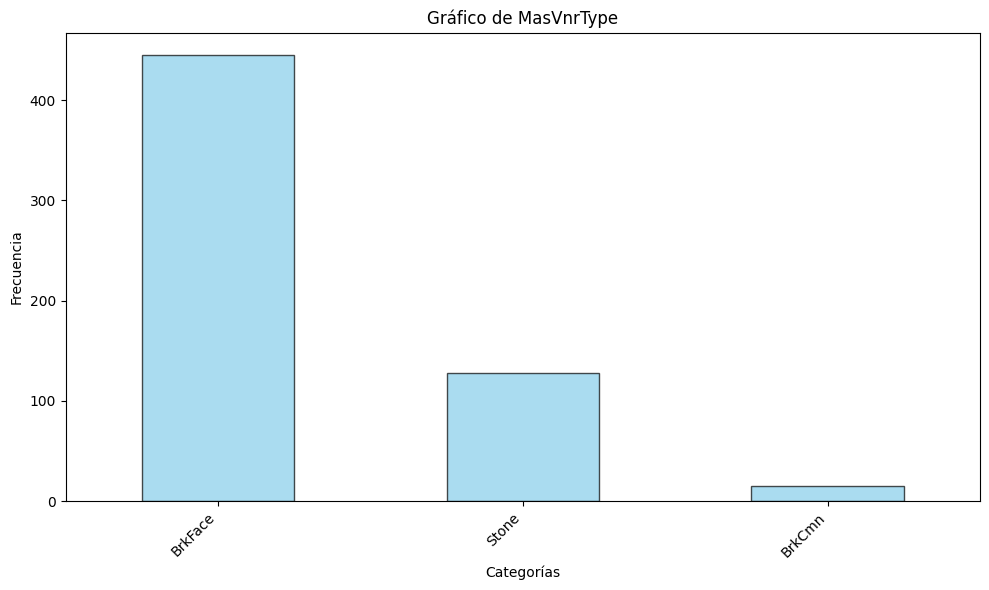



***ExterQual***


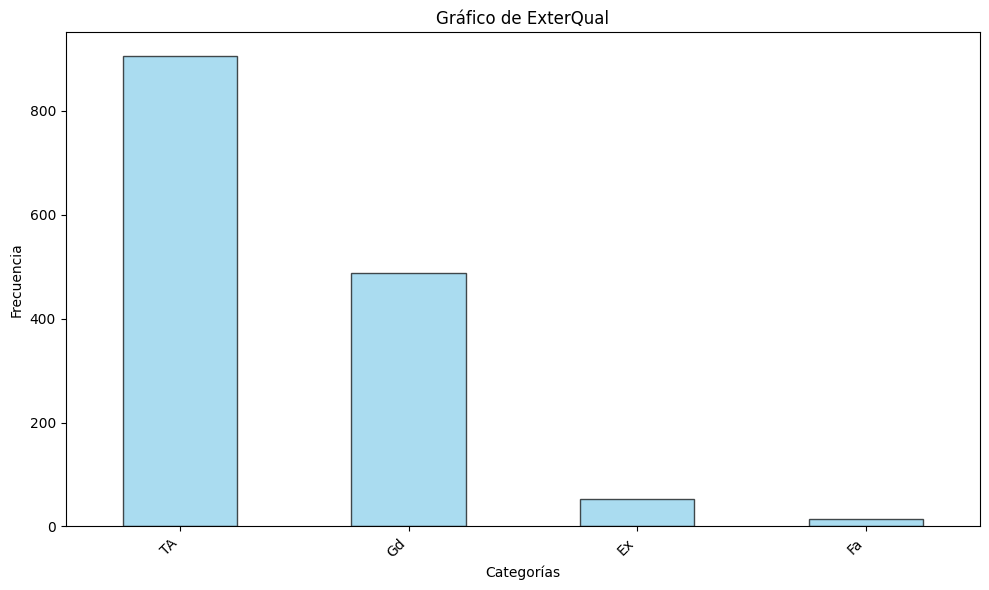



***ExterCond***


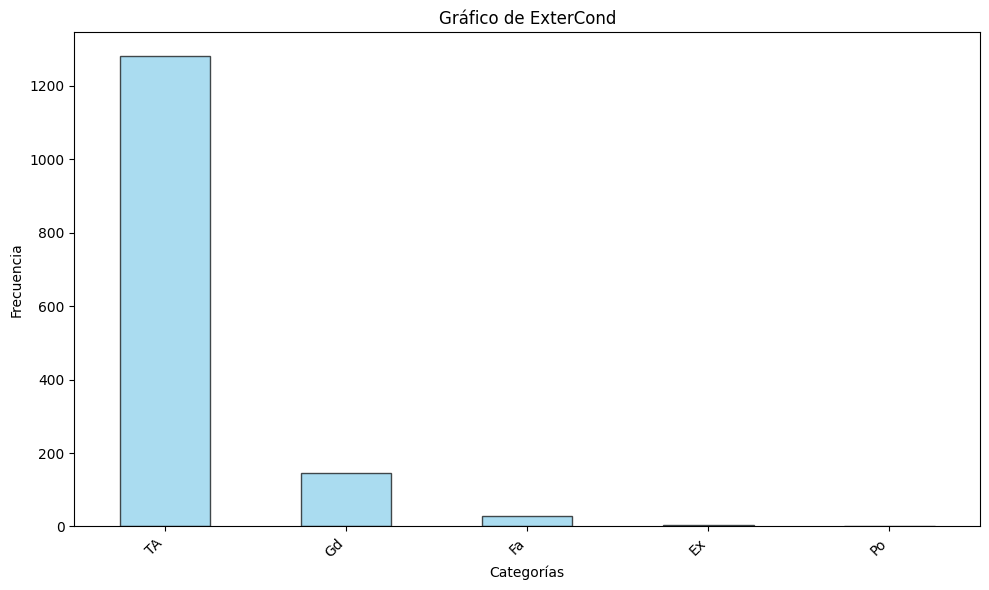



***Foundation***


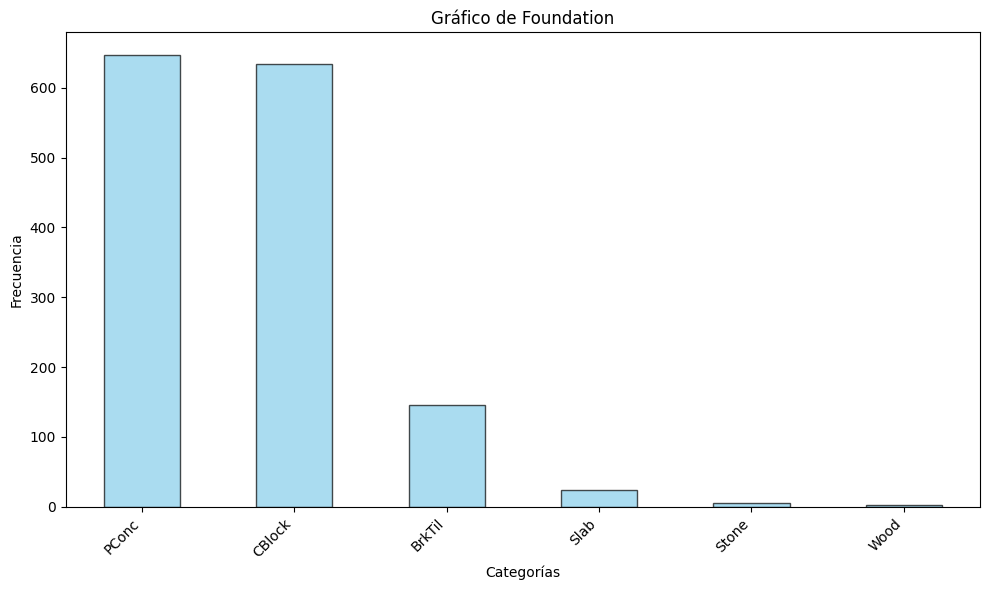



***BsmtQual***


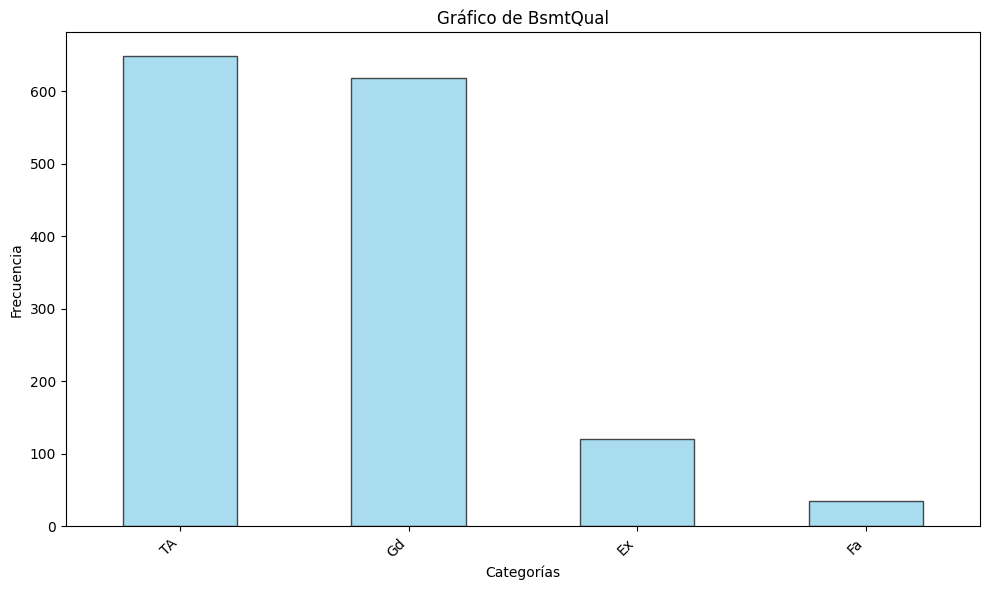



***BsmtCond***


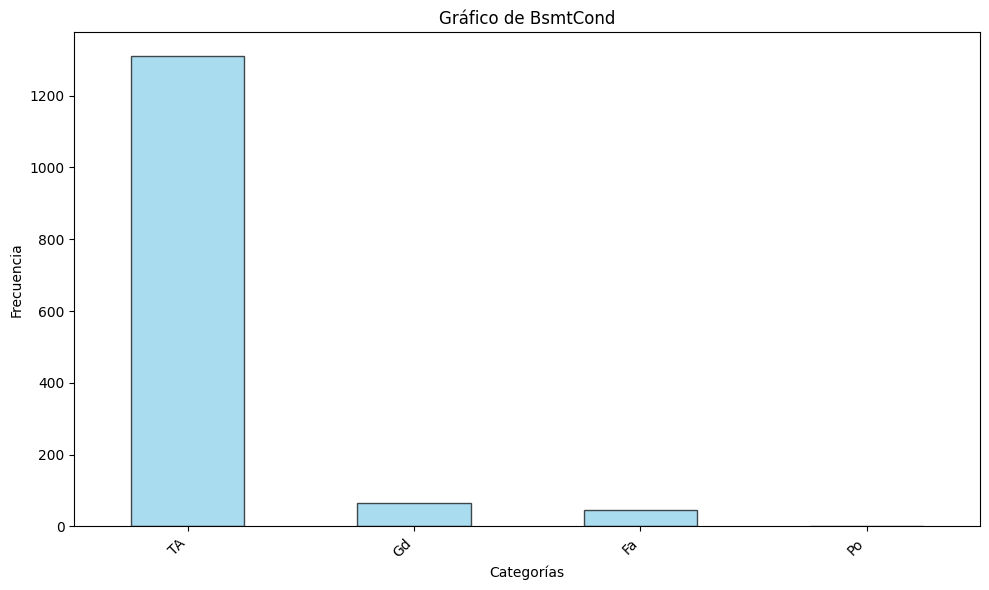



***BsmtExposure***


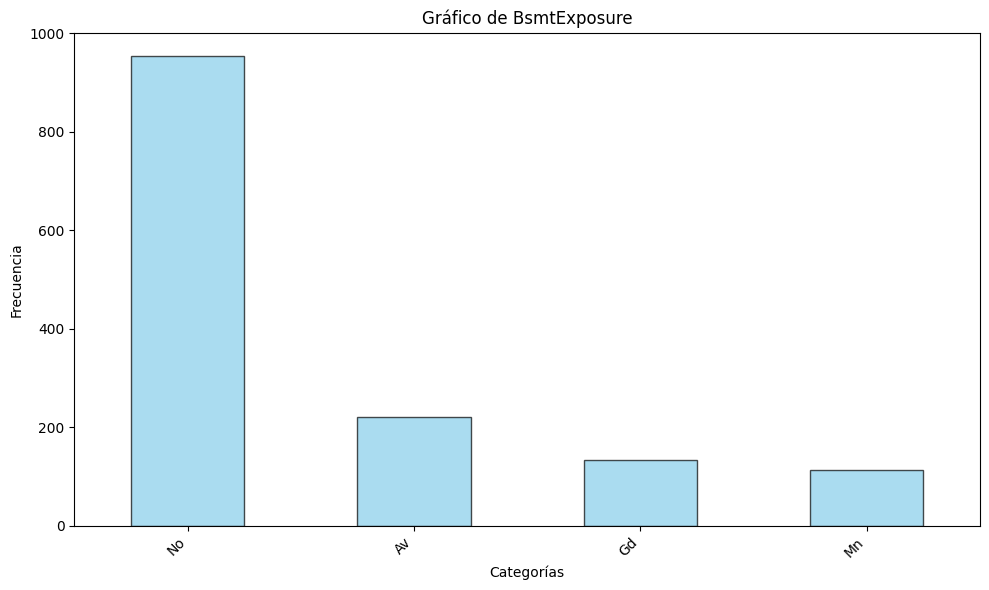



***BsmtFinType1***


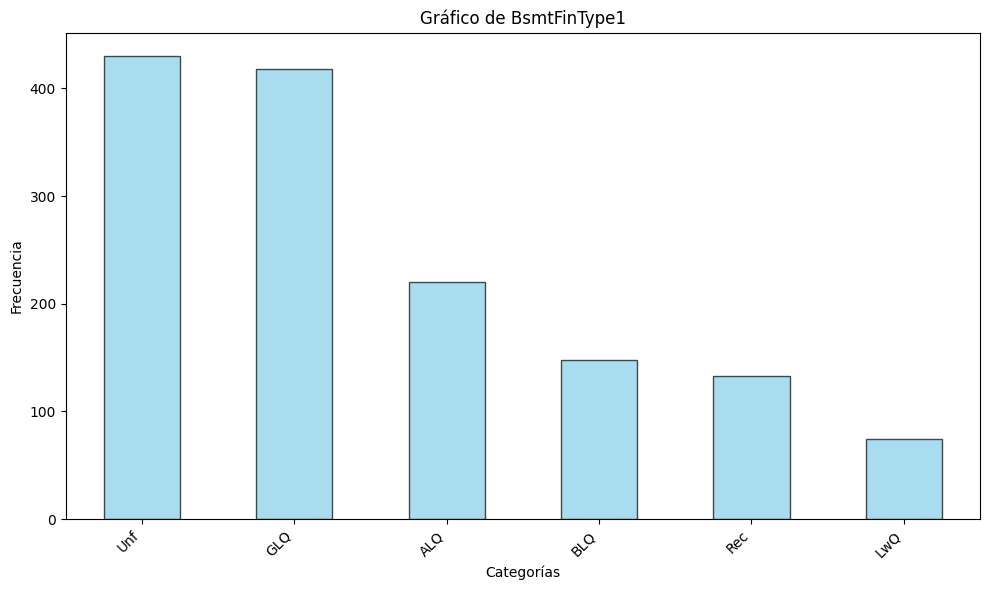



***BsmtFinType2***


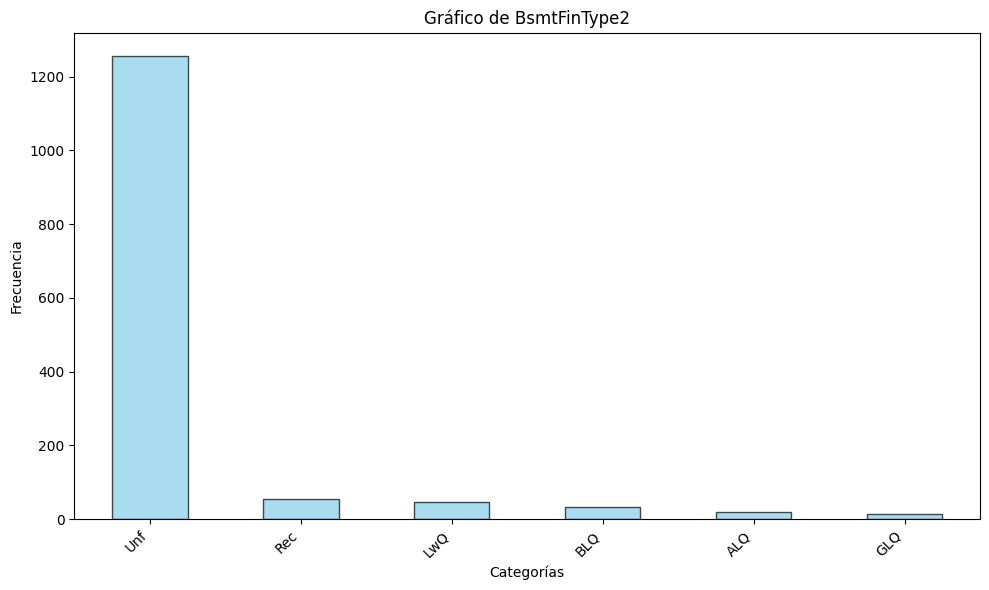



***Heating***


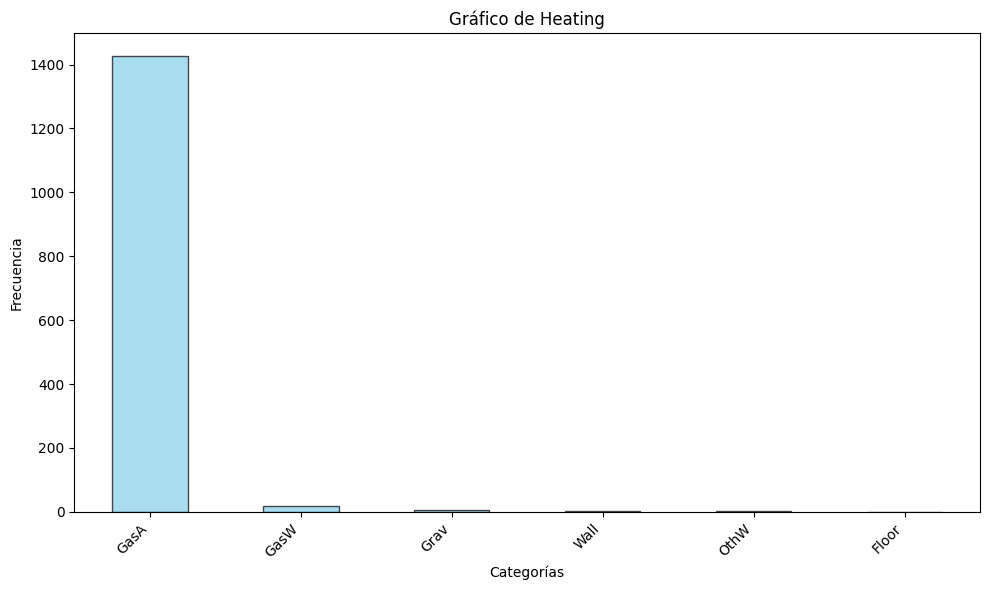



***HeatingQC***


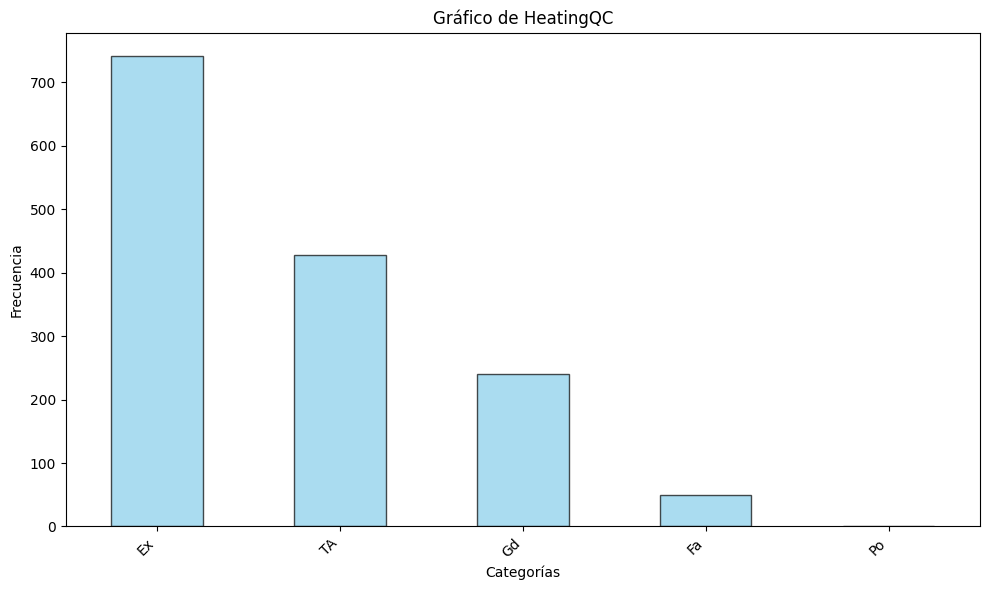



***CentralAir***


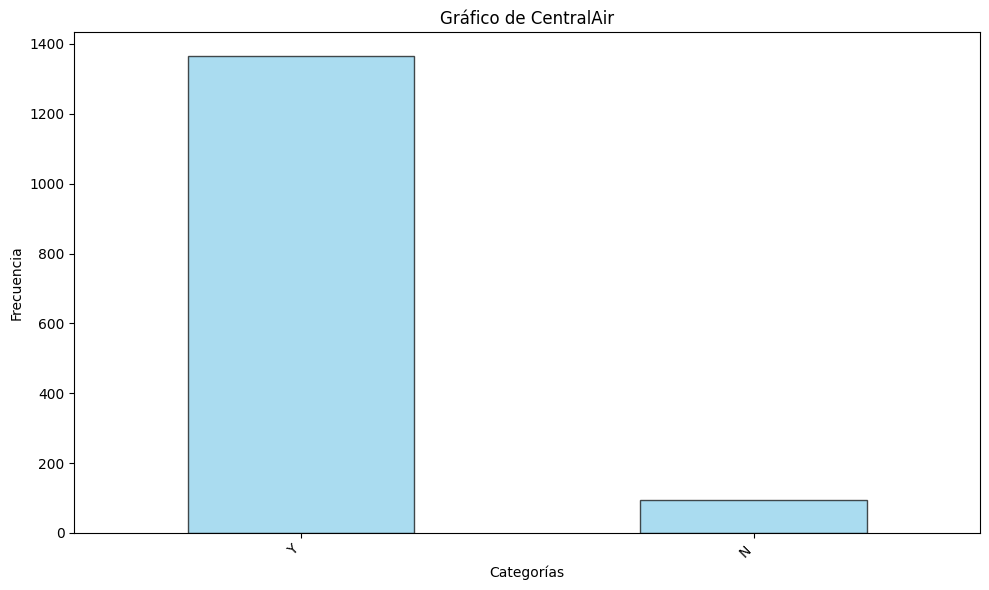



***Electrical***


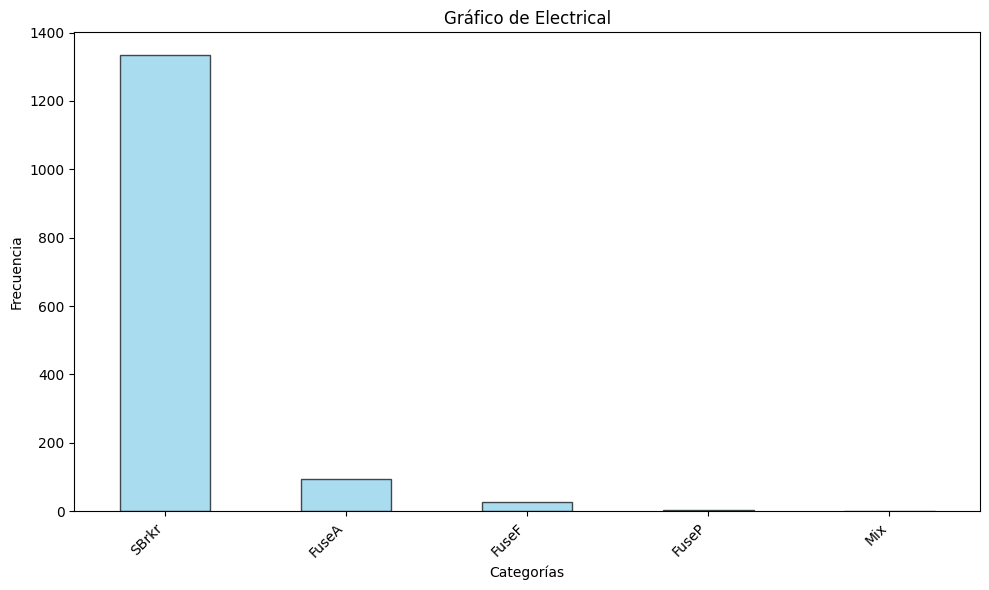



***KitchenQual***


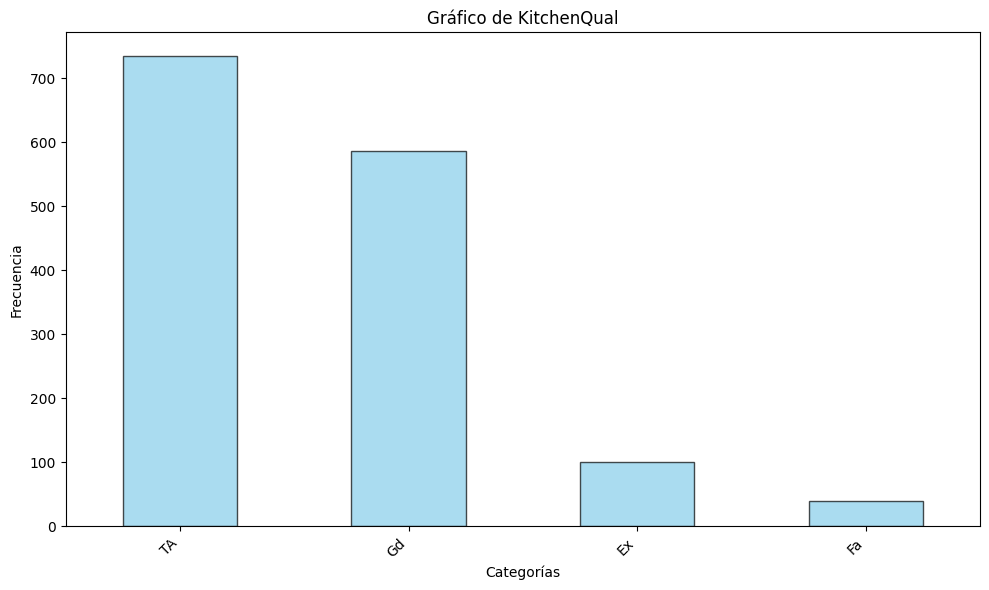



***Functional***


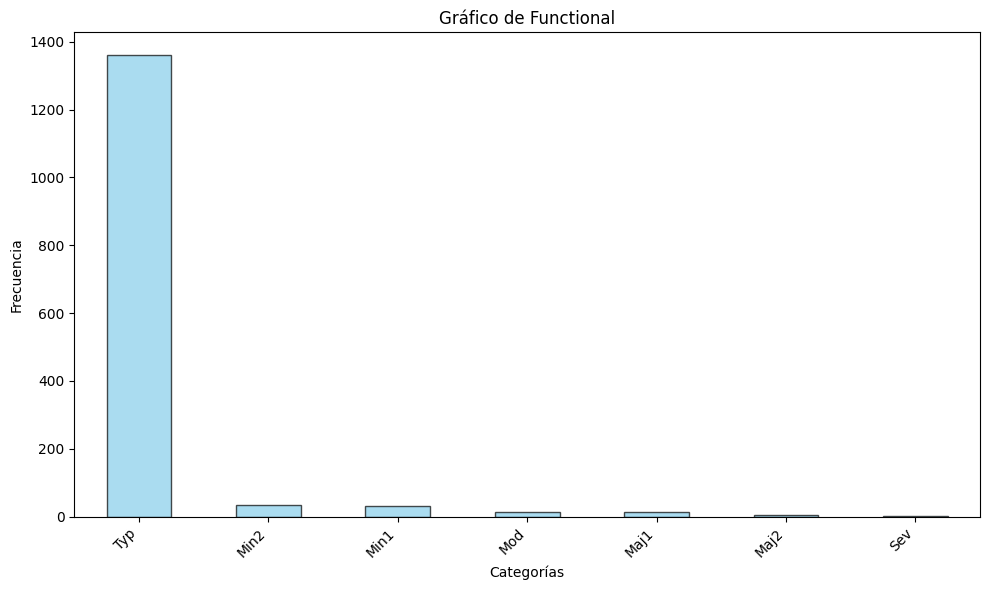



***FireplaceQu***


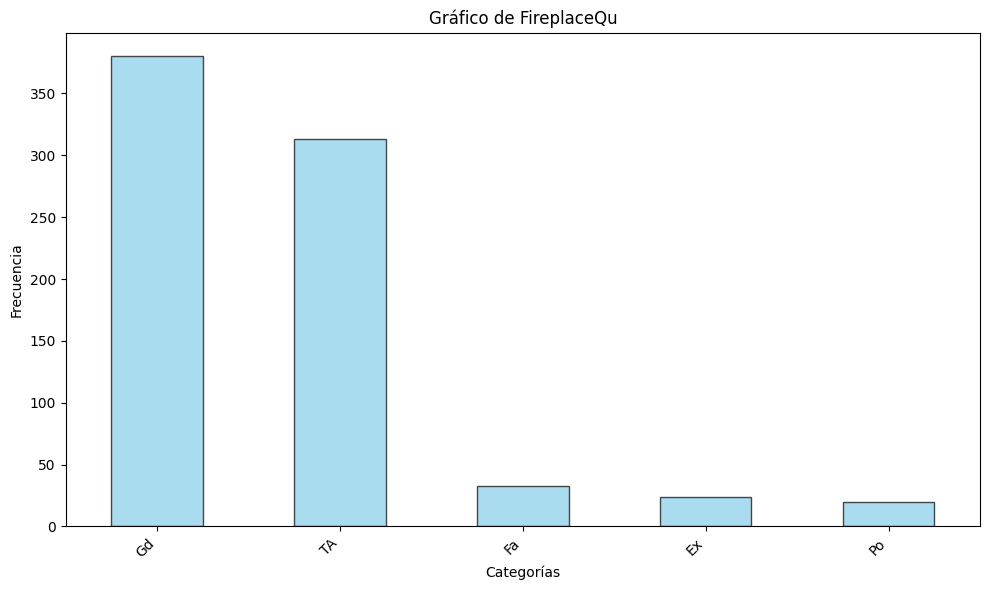



***GarageType***


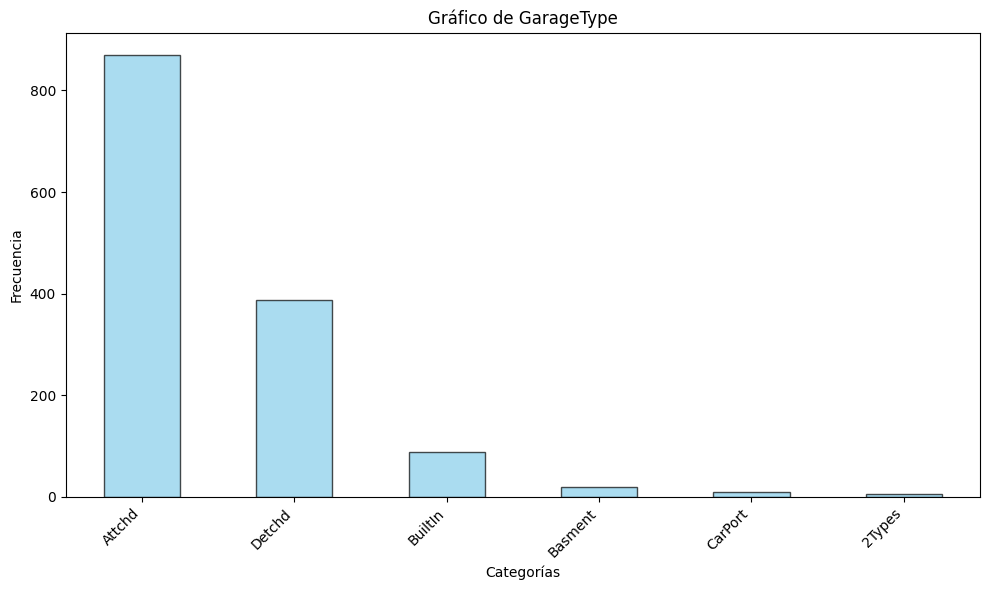



***GarageFinish***


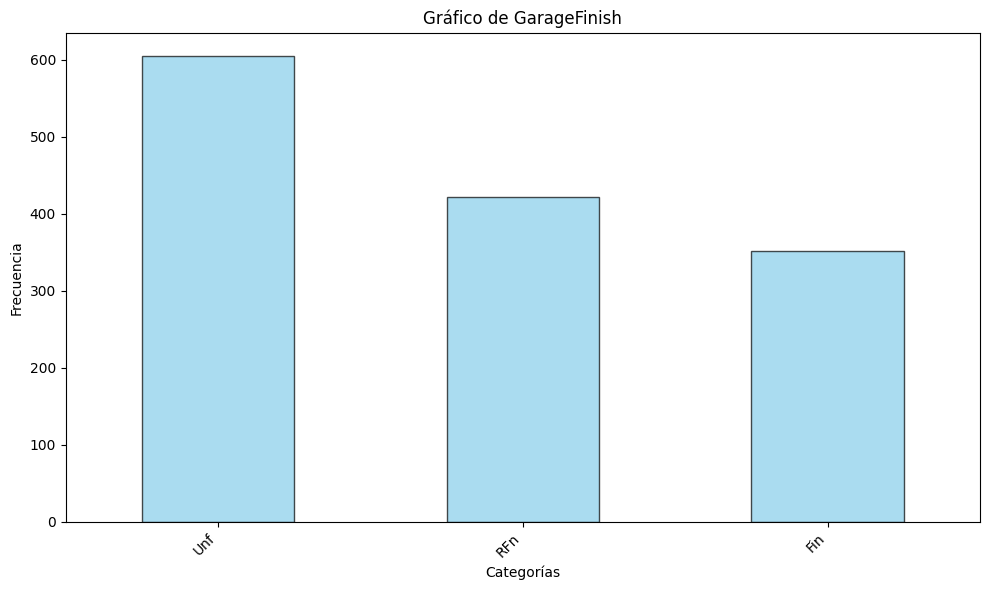



***GarageQual***


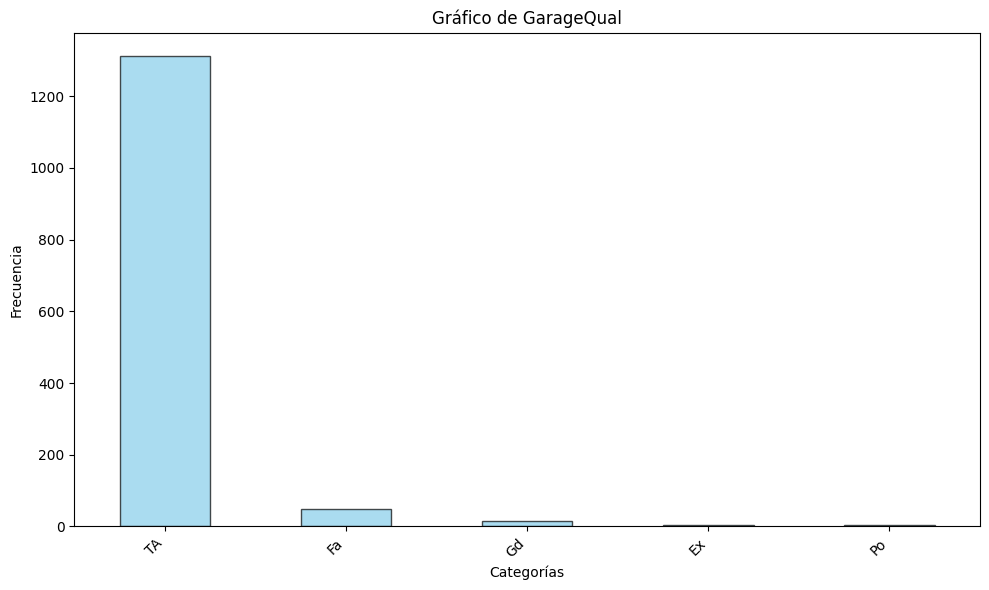



***GarageCond***


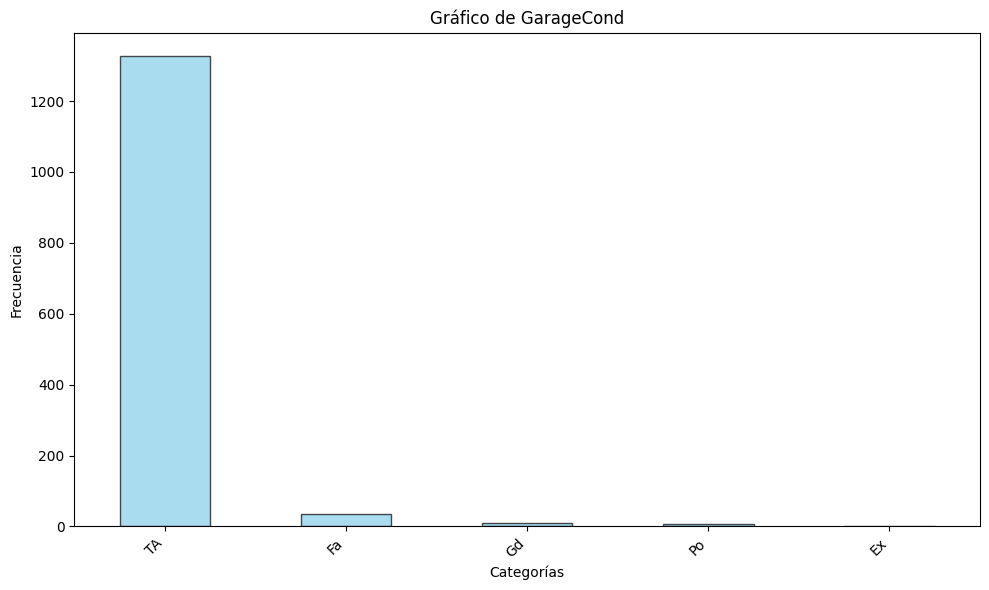



***PavedDrive***


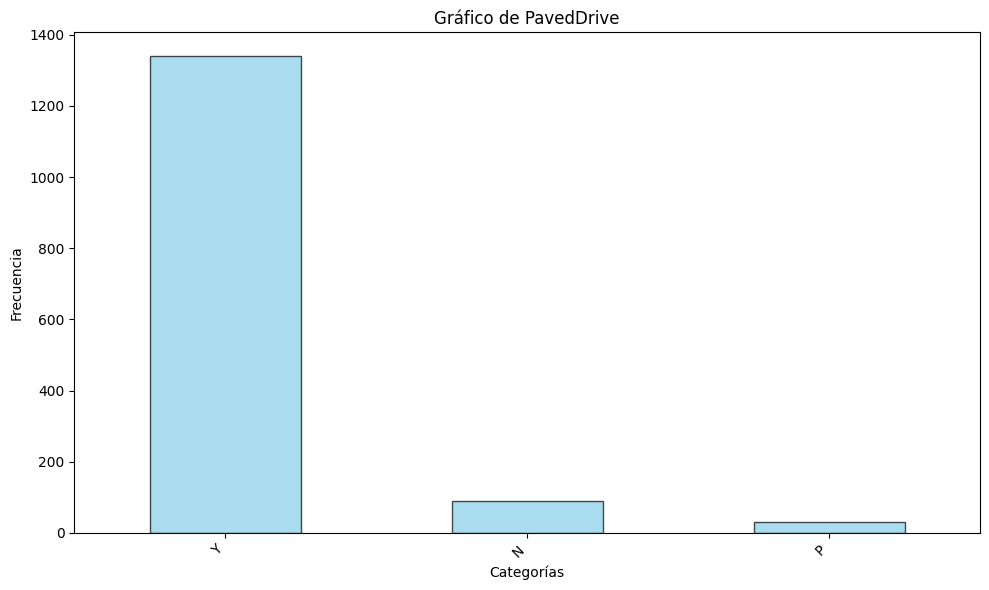



***PoolQC***


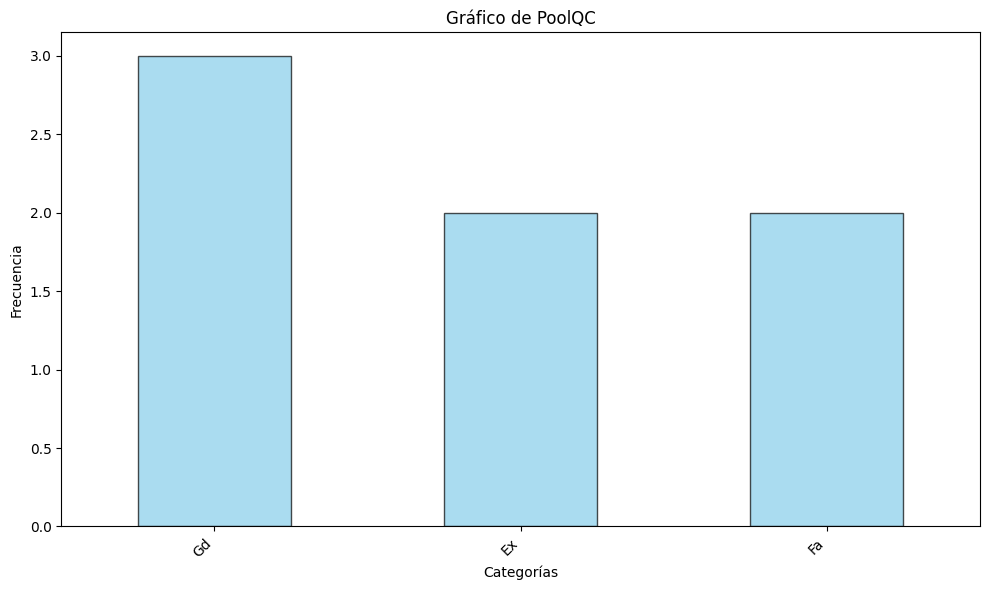



***Fence***


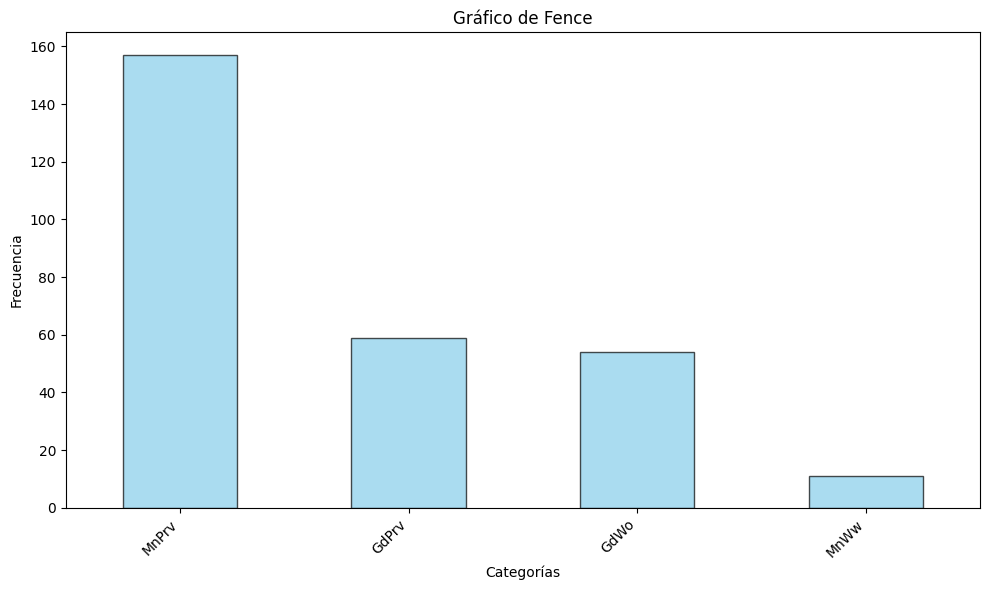



***MiscFeature***


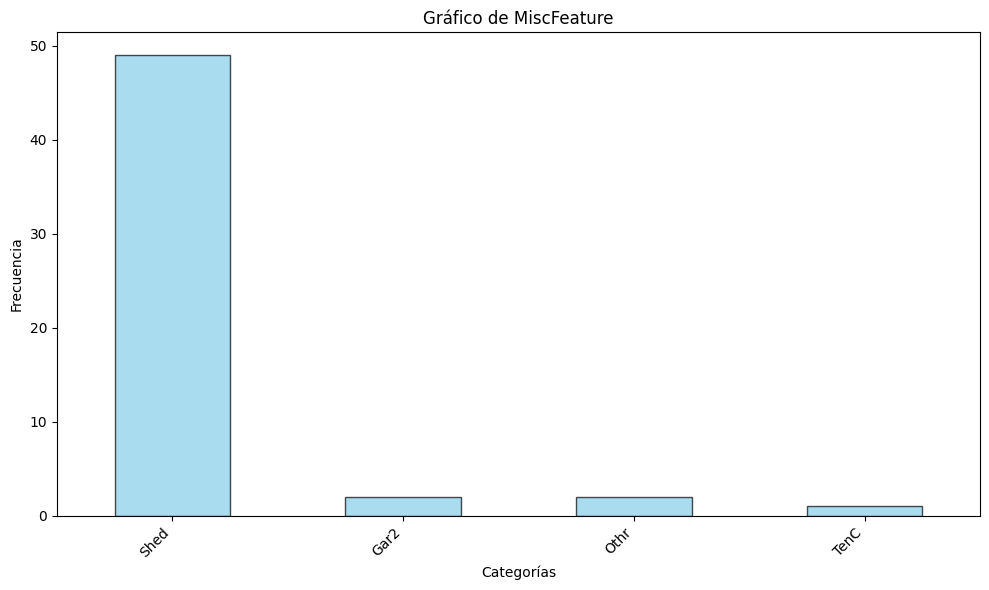



***SaleType***


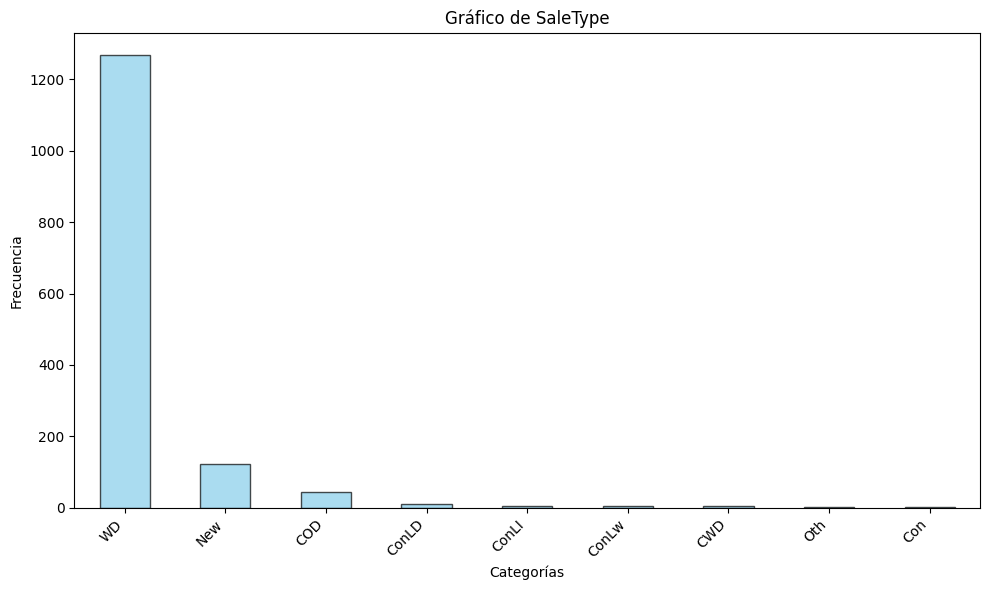



***SaleCondition***


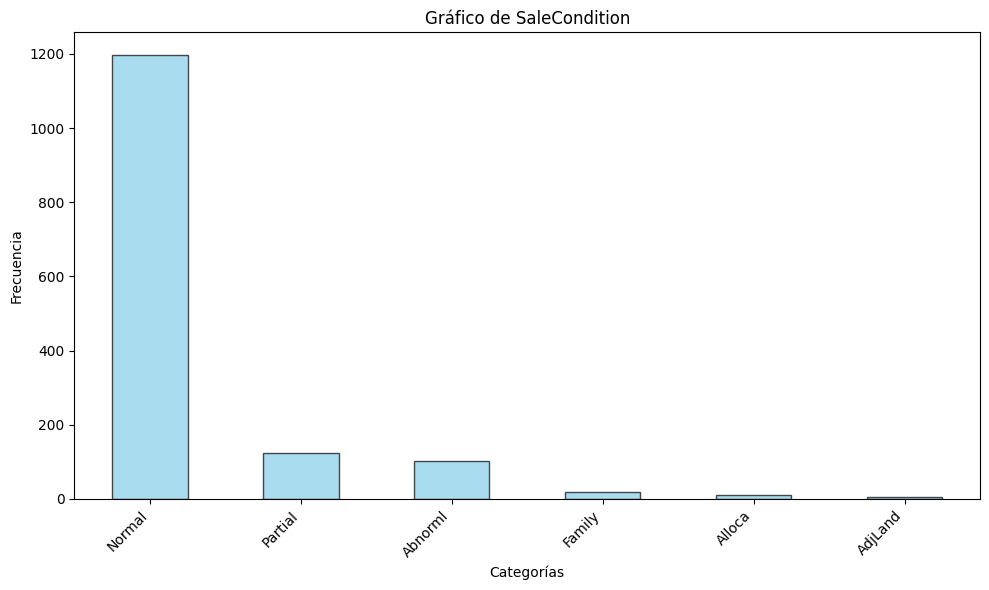



***MSSubClass***


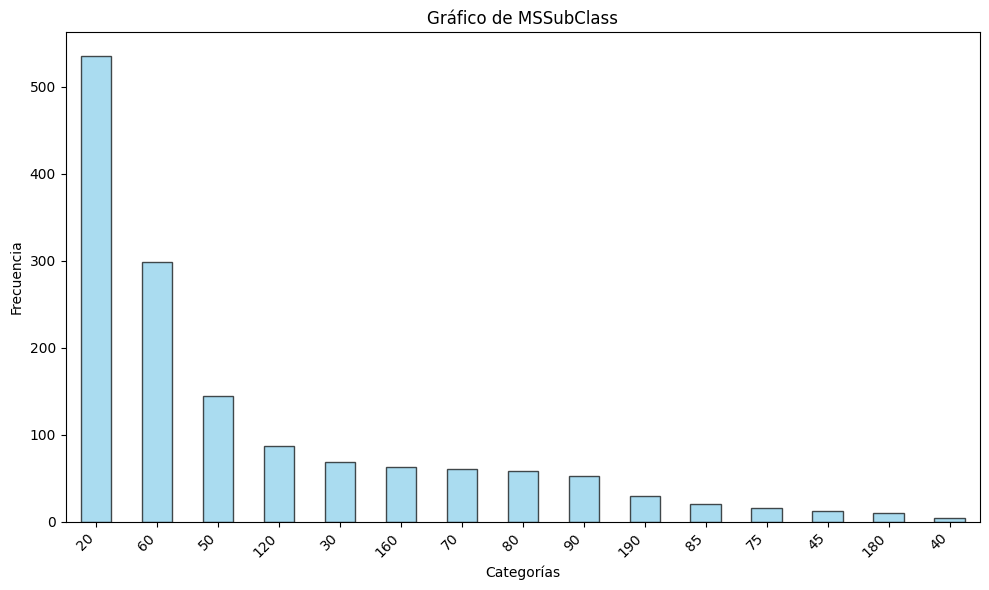



***MoSold***


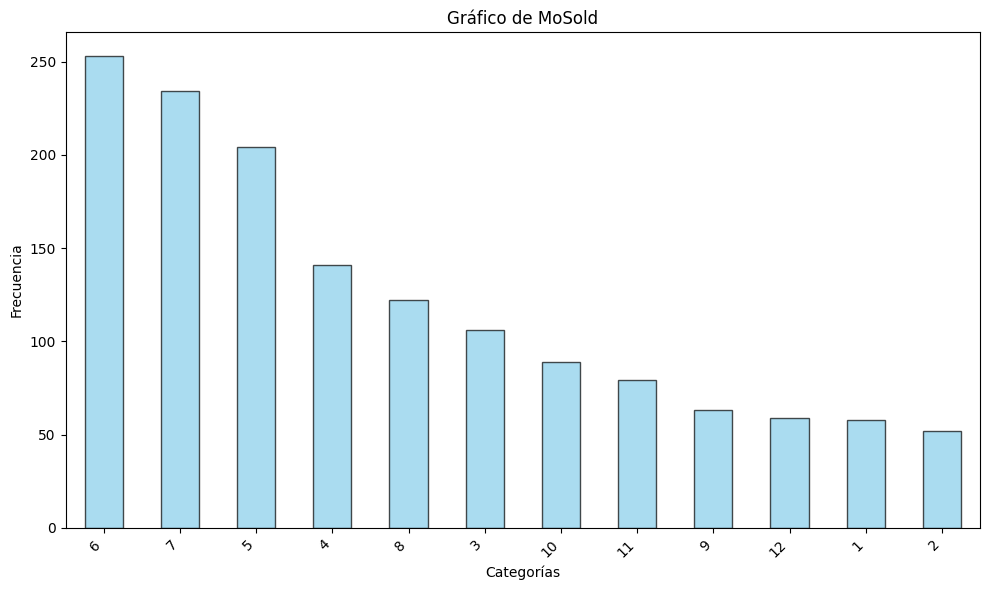

In [8]:
for col in cualitativas:
    print("***" + col + "***")
    funciones.frecuencias(house_prices[col], col)
    print("\n")